# DUBLIN NEW HOUSE PRICE ESTIMATION

In [1]:
# 2023034 - MAHMUT ZAHID MALKOC
import numpy as np
import pandas as pd
from skimpy import skim
from scipy.interpolate import interpolate
import scipy.stats as stats
from scipy.stats import poisson, chi2
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

## DATA PREPARATION

In [2]:
# 2023034 - MAHMUT ZAHID MALKOC
OtherDatasets = pd.read_excel("CA1_dataset.xlsx")
NewHousePrice = pd.read_csv("CA1_ireland_new_house_price.csv")
NationalHouseConstructionCostIndex = pd.read_csv("CA1_national_house_construction_cost_index.csv")

In [3]:
# 2023034 - MAHMUT ZAHID MALKOC
OtherDatasets

Year  IEPopulation  DublinPopulation  IEUrbanPopulation  \
0   2016       4715788           1176000            2983355   
1   2015       4665760           1163000            2940510   
2   2014       4622167           1150000            2903635   
3   2013       4588832           1138000            2873286   
4   2012       4564550           1126000            2849043   
5   2011       4544501           1113000            2827835   
6   2010       4524585           1100000            2806411   
7   2009       4499792           1087000            2782090   
8   2008       4452392           1074000            2744952   
9   2007       4359834           1061000            2680715   
10  2006       4234806           1048000            2595694   
11  2005       4121216           1037000            2515791   
12  2004       4031954           1027000            2450379   
13  2003       3958705           1017000            2394915   
14  2002       3894258           1006000            2345367   
15  2001       3829018            997000            2296510   
16  2000       3768950            989000            2250951   
17  1999       3719912            980000            2211944   
18  1998       3678667            971000            2178016   
19  1997       3640150            963000            2146414   
20  1996       3606728            954000            2116049   
21  1995       3579482            946000            2091287   
22  1994       3559398            939000            2072766   
23  1993       3545700            932000            2056779   
24  1992       3528367            924000            2038731   
25  1991       3504805            917000            2017094   
26  1990       3485374            916000            2000470   
27  1989       3483314            917000            1994394   
28  1988       3498030            919000            1997871   
29  1987       3513700            920000            2002008   
30  1986       3515669            921000            1997341   
31  1985       3505769            920000            1991056   
32  1984       3490931            919000            1982219   
33  1983       3472903            918000            1964356   
34  1982       3451212            917000            1944867   
35  1981       3424827            915000            1921042   
36  1980       3391387            903000            1888405   
37  1979       3351898            889000            1855360   
38  1978       3305571            875000            1819520   
39  1977       3254662            861000            1782727   
40  1976       3205753            847000            1747737   
41  1975       3157919            833000            1710683   

    IEMigrantPopulation  IEInflationRate  IEInflationAnnualChangeRate  \
0                   NaN           0.0001                       0.0030   
1              746260.0          -0.0029                      -0.0047   
2              738401.0           0.0018                      -0.0033   
3              738401.0           0.0051                      -0.0119   
4              738401.0           0.0170                      -0.0086   
5              738401.0           0.0256                       0.0348   
6              730542.0          -0.0092                       0.0356   
7              659794.0          -0.0448                      -0.0854   
8              659794.0           0.0406                      -0.0084   
9              659794.0           0.0490                       0.0097   
10             659794.0           0.0393                       0.0150   
11             589046.0           0.0243                       0.0023   
12             469799.0           0.0220                      -0.0129   
13             469799.0           0.0349                      -0.0112   
14             469799.0           0.0461                      -0.0026   
15             469799.0           0.0487                      -0.0072   
16             350552.0           0.0559             

In [4]:
# 2023034 - MAHMUT ZAHID MALKOC
NewHousePrice

Year  Dublin Value  National Value
0   1975         13137           13254
1   1976         15342           15564
2   1977         19055           18754
3   1978         25745           24082
4   1979         32005           29387
5   1980         37822           34967
6   1981         44456           40167
7   1982         48886           44060
8   1983         48169           44448
9   1984         48819           45419
10  1985         49166           46542
11  1986         50891           48256
12  1987         50864           48151
13  1988         57994           52450
14  1989         68393           58178
15  1990         80749           65541
16  1991         78715           66914
17  1992         79200           69264
18  1993         75539           69883
19  1994         81993           72732
20  1995         86671           77994
21  1996         97058           87202
22  1997        122036          102222
23  1998        160699          125302
24  1999        193526          148521
25  2000        221724          169191
26  2001        243095          182863
27  2002        256109          198087
28  2003        291646          224567
29  2004        322628          249191
30  2005        350891          276221
31  2006        405957          305637
32  2007        416225          322634
33  2008        370495          305269
34  2009        260170          242033
35  2010        251629          228268
36  2011        290668          230303
37  2012        265633          220415
38  2013        300466          228216
39  2014        333720          246378
40  2015        377741          281432
41  2016        397676          313483

In [5]:
# 2023034 - MAHMUT ZAHID MALKOC
NationalHouseConstructionCostIndex

Year  Yearly average  % Increase on previous year
0   1994           111.0                        0.034
1   1995           114.7                        0.033
2   1996           116.3                        0.014
3   1997           120.4                        0.035
4   1998           124.9                        0.037
5   1999           131.0                        0.049
6   2000           141.0                        0.076
7   2001           161.5                        0.145
8   2002           171.8                        0.064
9   2003           176.5                        0.027
10  2004           181.5                        0.028
11  2005           186.9                        0.030
12  2006           194.2                        0.039
13  2007           201.7                        0.039
14  2008           209.4                        0.038
15  2009           206.5                       -0.014
16  2010           208.7                        0.011
17  2011           203.1                       -0.027
18  2012           203.5                        0.002
19  2013           204.7                        0.006
20  2014           206.0                        0.006
21  2015           207.1                        0.005

In [6]:
# 2023034 - MAHMUT ZAHID MALKOC
CombineDataset = pd.merge(NationalHouseConstructionCostIndex,NewHousePrice, how="right", on="Year")
CombineDataset

Year  Yearly average  % Increase on previous year  Dublin Value  \
0   1975             NaN                          NaN         13137   
1   1976             NaN                          NaN         15342   
2   1977             NaN                          NaN         19055   
3   1978             NaN                          NaN         25745   
4   1979             NaN                          NaN         32005   
5   1980             NaN                          NaN         37822   
6   1981             NaN                          NaN         44456   
7   1982             NaN                          NaN         48886   
8   1983             NaN                          NaN         48169   
9   1984             NaN                          NaN         48819   
10  1985             NaN                          NaN         49166   
11  1986             NaN                          NaN         50891   
12  1987             NaN                          NaN         50864   
13  1988             NaN                          NaN         57994   
14  1989             NaN                          NaN         68393   
15  1990             NaN                          NaN         80749   
16  1991             NaN                          NaN         78715   
17  1992             NaN                          NaN         79200   
18  1993             NaN                          NaN         75539   
19  1994           111.0                        0.034         81993   
20  1995           114.7                        0.033         86671   
21  1996           116.3                        0.014         97058   
22  1997           120.4                        0.035        122036   
23  1998           124.9                        0.037        160699   
24  1999           131.0                        0.049        193526   
25  2000           141.0                        0.076        221724   
26  2001           161.5                        0.145        243095   
27  2002           171.8                        0.064        256109   
28  2003           176.5                        0.027        291646   
29  2004           181.5                        0.028        322628   
30  2005           186.9                        0.030        350891   
31  2006           194.2                        0.039        405957   
32  2007           201.7                        0.039        416225   
33  2008           209.4                        0.038        370495   
34  2009           206.5                       -0.014        260170   
35  2010           208.7                        0.011        251629   
36  2011           203.1                       -0.027        290668   
37  2012           203.5                        0.002        265633   
38  2013           204.7                        0.006        300466   
39  2014           206.0                        0.006        333720   
40  2015           207.1                        0.005        377741   
41  2016             NaN                          NaN        397676   

    National Value  
0            13254  
1            15564  
2            18754  
3            24082  
4            29387  
5            34967  
6            40167  
7            44060  
8            44448  
9            45419  
10           46542  
11           48256  
12           48151  
13           52450  
14           58178  
15           65541  
16           66914  
17           69264  
18           69883  
19           72732  
20           77994  
21           87202  
22          102222  
23          125302  
24          148521  
25          169191  
26          182863  
27          198087  
28          224567  
29          249191  
30          276221  
31          305637  
32          322634  
33          305269  
34          242033  
35          228268  
36          230303  
37          220415  
38          228216  
39          246378  
40          281432  
41          313483

In [7]:
# 2023034 - MAHMUT ZAHID MALKOC
housing = pd.merge(CombineDataset,OtherDatasets, how="right", on="Year")
housing

Year  Yearly average  % Increase on previous year  Dublin Value  \
0   2016             NaN                          NaN        397676   
1   2015           207.1                        0.005        377741   
2   2014           206.0                        0.006        333720   
3   2013           204.7                        0.006        300466   
4   2012           203.5                        0.002        265633   
5   2011           203.1                       -0.027        290668   
6   2010           208.7                        0.011        251629   
7   2009           206.5                       -0.014        260170   
8   2008           209.4                        0.038        370495   
9   2007           201.7                        0.039        416225   
10  2006           194.2                        0.039        405957   
11  2005           186.9                        0.030        350891   
12  2004           181.5                        0.028        322628   
13  2003           176.5                        0.027        291646   
14  2002           171.8                        0.064        256109   
15  2001           161.5                        0.145        243095   
16  2000           141.0                        0.076        221724   
17  1999           131.0                        0.049        193526   
18  1998           124.9                        0.037        160699   
19  1997           120.4                        0.035        122036   
20  1996           116.3                        0.014         97058   
21  1995           114.7                        0.033         86671   
22  1994           111.0                        0.034         81993   
23  1993             NaN                          NaN         75539   
24  1992             NaN                          NaN         79200   
25  1991             NaN                          NaN         78715   
26  1990             NaN                          NaN         80749   
27  1989             NaN                          NaN         68393   
28  1988             NaN                          NaN         57994   
29  1987             NaN                          NaN         50864   
30  1986             NaN                          NaN         50891   
31  1985             NaN                          NaN         49166   
32  1984             NaN                          NaN         48819   
33  1983             NaN                          NaN         48169   
34  1982             NaN                          NaN         48886   
35  1981             NaN                          NaN         44456   
36  1980             NaN                          NaN         37822   
37  1979             NaN                          NaN         32005   
38  1978             NaN                          NaN         25745   
39  1977             NaN                          NaN         19055   
40  1976             NaN                          NaN         15342   
41  1975             NaN                          NaN         13137   

    National Value  IEPopulation  DublinPopulation  IEUrbanPopulation  \
0           313483       4715788           1176000            2983355   
1           281432       4665760           1163000            2940510   
2           246378       4622167           1150000            2903635   
3           228216       4588832           1138000            2873286   
4           220415       4564550           1126000            2849043   
5           230303       4544501           1113000            2827835   
6           228268       4524585           1100000            2806411   
7           242033       4499792           1087000            2782090   
8           305269       4452392           1074000            2744952   
9           322634       4359834           1061000            2680715   
10          305637       4234806           1048000            2595694   
11          276221       4121216           1037000            2515791   
1

In [8]:
# 2023034 - MAHMUT ZAHID MALKOC
housing = housing.rename(columns={"Yearly average": "NationalHouseConstructionCostIndex100Base1991", "% Increase on previous year": "NationalHouseConstructionCostIndexIncreaseonPreviousYearRate", "Dublin Value": "DublinNewHousePrice€", "National Value": "NationalNewHousePrice€"})
housing

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                            NaN   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                            NaN   
24  1992                                            NaN   
25  1991                                            NaN   
26  1990                                            NaN   
27  1989                                            NaN   
28  1988                                            NaN   
29  1987                                            NaN   
30  1986                                            NaN   
31  1985                                            NaN   
32  1984                                            NaN   
33  1983                                            NaN   
34  1982                                            NaN   
35  1981                                            NaN   
36  1980                                            NaN   
37  1979                                            NaN   
38  1978                                            NaN   
39  1977                                            NaN   
40  1976                                            NaN   
41  1975                                            NaN   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                                 NaN              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [9]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.count()

Year                                                            42
NationalHouseConstructionCostIndex100Base1991                   22
NationalHouseConstructionCostIndexIncreaseonPreviousYearRate    22
DublinNewHousePrice€                                            42
NationalNewHousePrice€                                          42
IEPopulation                                                    42
DublinPopulation                                                42
IEUrbanPopulation                                               42
IEMigrantPopulation                                             41
IEInflationRate                                                 42
IEInflationAnnualChangeRate                                     42
IEGDP$B                                                         42
IEGDPPerCapita$                                                 42
IEGDPGrowthRate                                                 42
IEUnemploymentRate                                            

In [10]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.isnull()

Year  NationalHouseConstructionCostIndex100Base1991  \
0   False                                           True   
1   False                                          False   
2   False                                          False   
3   False                                          False   
4   False                                          False   
5   False                                          False   
6   False                                          False   
7   False                                          False   
8   False                                          False   
9   False                                          False   
10  False                                          False   
11  False                                          False   
12  False                                          False   
13  False                                          False   
14  False                                          False   
15  False                                          False   
16  False                                          False   
17  False                                          False   
18  False                                          False   
19  False                                          False   
20  False                                          False   
21  False                                          False   
22  False                                          False   
23  False                                           True   
24  False                                           True   
25  False                                           True   
26  False                                           True   
27  False                                           True   
28  False                                           True   
29  False                                           True   
30  False                                           True   
31  False                                           True   
32  False                                           True   
33  False                                           True   
34  False                                           True   
35  False                                           True   
36  False                                           True   
37  False                                           True   
38  False                                           True   
39  False                                           True   
40  False                                           True   
41  False                                           True   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                                True              
1                                               False              
2                                               False              
3                                               False              
4                                               False              
5                                               False              
6                                               False              
7                                               False              
8                                               False              
9                                               False              
10                                              False              
11                                              False              
12                                              False              
13                                              False              
14                                              False              
15                                              False              
16                                              False              
17                                              False              
18                                              False              
19                                              False           

In [11]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.isnull().sum()

Year                                                             0
NationalHouseConstructionCostIndex100Base1991                   20
NationalHouseConstructionCostIndexIncreaseonPreviousYearRate    20
DublinNewHousePrice€                                             0
NationalNewHousePrice€                                           0
IEPopulation                                                     0
DublinPopulation                                                 0
IEUrbanPopulation                                                0
IEMigrantPopulation                                              1
IEInflationRate                                                  0
IEInflationAnnualChangeRate                                      0
IEGDP$B                                                          0
IEGDPPerCapita$                                                  0
IEGDPGrowthRate                                                  0
IEUnemploymentRate                                            

In [12]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.ndim

2

In [13]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Year                                                          42 non-null     int64  
 1   NationalHouseConstructionCostIndex100Base1991                 22 non-null     float64
 2   NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  22 non-null     float64
 3   DublinNewHousePrice€                                          42 non-null     int64  
 4   NationalNewHousePrice€                                        42 non-null     int64  
 5   IEPopulation                                                  42 non-null     int64  
 6   DublinPopulation                                              42 non-null     int64  
 7   IEUrbanPopulation                                             42 non-null

In [14]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.shape

(42, 18)

In [15]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.size

756

In [16]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.keys()

Index(['Year', 'NationalHouseConstructionCostIndex100Base1991',
       'NationalHouseConstructionCostIndexIncreaseonPreviousYearRate',
       'DublinNewHousePrice€', 'NationalNewHousePrice€', 'IEPopulation',
       'DublinPopulation', 'IEUrbanPopulation', 'IEMigrantPopulation',
       'IEInflationRate', 'IEInflationAnnualChangeRate', 'IEGDP$B',
       'IEGDPPerCapita$', 'IEGDPGrowthRate', 'IEUnemploymentRate',
       'IEUnemploymentRateAnnualChangeRate', 'IERefugeesGrantedAsylum',
       'IERefugeesGrantedAsylumAnnualChangeRate'],
      dtype='object')

In [17]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.head()

Year  NationalHouseConstructionCostIndex100Base1991  \
0  2016                                            NaN   
1  2015                                          207.1   
2  2014                                          206.0   
3  2013                                          204.7   
4  2012                                          203.5   

   NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                                NaN              
1                                              0.005              
2                                              0.006              
3                                              0.006              
4                                              0.002              

   DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
0                397676                  313483       4715788   
1                377741                  281432       4665760   
2                333720                  246378       4622167   
3                300466                  228216       4588832   
4                265633                  220415       4564550   

   DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  IEInflationRate  \
0           1176000            2983355                  NaN           0.0001   
1           1163000            2940510             746260.0          -0.0029   
2           1150000            2903635             738401.0           0.0018   
3           1138000            2873286             738401.0           0.0051   
4           1126000            2849043             738401.0           0.0170   

   IEInflationAnnualChangeRate  IEGDP$B  IEGDPPerCapita$  IEGDPGrowthRate  \
0                       0.0030   299.09            62896           0.0201   
1                      -0.0047   291.78            62054           0.2437   
2                      -0.0033   259.17            55643           0.0865   
3                      -0.0119   238.34            51546           0.0113   
4                      -0.0086   225.63            49055          -0.0001   

   IEUnemploymentRate  IEUnemploymentRateAnnualChangeRate  \
0              0.0837                             -0.0154   
1              0.0991                             -0.0195   
2              0.1186                             -0.0187   
3              0.1373                             -0.0172   
4              0.1545                              0.0010   

   IERefugeesGrantedAsylum  IERefugeesGrantedAsylumAnnualChangeRate  
0                   5720.0                                  -0.0635  
1                   6108.0                                   0.0473  
2                   5832.0                                  -0.0265  
3                   5991.0                                  -0.0504  
4                   6309.0                                  -0.2338

In [18]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.tail()

Year  NationalHouseConstructionCostIndex100Base1991  \
37  1979                                            NaN   
38  1978                                            NaN   
39  1977                                            NaN   
40  1976                                            NaN   
41  1975                                            NaN   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
37                                                NaN              
38                                                NaN              
39                                                NaN              
40                                                NaN              
41                                                NaN              

    DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
37                 32005                   29387       3351898   
38                 25745                   24082       3305571   
39                 19055                   18754       3254662   
40                 15342                   15564       3205753   
41                 13137                   13254       3157919   

    DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  IEInflationRate  \
37            889000            1855360             197334.0           0.1330   
38            875000            1819520             197334.0           0.0771   
39            861000            1782727             197334.0           0.1347   
40            847000            1747737             197334.0           0.1799   
41            833000            1710683             171429.0           0.2088   

    IEInflationAnnualChangeRate  IEGDP$B  IEGDPPerCapita$  IEGDPGrowthRate  \
37                       0.0558    18.32             5430           0.0307   
38                      -0.0576    14.65             4400           0.0719   
39                      -0.0451    11.25             3427           0.0821   
40                      -0.0289     9.45             2920           0.0139   
41                       0.0390     9.48             2973           0.0566   

    IEUnemploymentRate  IEUnemploymentRateAnnualChangeRate  \
37                 NaN                                 NaN   
38                 NaN                                 NaN   
39                 NaN                                 NaN   
40                 NaN                                 NaN   
41                 NaN                                 NaN   

    IERefugeesGrantedAsylum  IERefugeesGrantedAsylumAnnualChangeRate  
37                      NaN                                      NaN  
38                      NaN                                      NaN  
39                      NaN                                      NaN  
40                      NaN                                      NaN  
41                      NaN                                      NaN

In [19]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.describe()

Year  NationalHouseConstructionCostIndex100Base1991  \
count    42.000000                                      22.000000   
mean   1995.500000                                     171.927273   
std      12.267844                                      37.032819   
min    1975.000000                                     111.000000   
25%    1985.250000                                     133.500000   
50%    1995.500000                                     184.200000   
75%    2005.750000                                     204.400000   
max    2016.000000                                     209.400000   

       NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
count                                          22.000000              
mean                                            0.030773              
std                                             0.034878              
min                                            -0.027000              
25%                                             0.007250              
50%                                             0.031500              
75%                                             0.038750              
max                                             0.145000              

       DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
count             42.000000               42.000000  4.200000e+01   
mean          167223.880952           135081.952381  3.815458e+06   
std           133489.764768           102007.924470  4.749023e+05   
min            13137.000000            13254.000000  3.157919e+06   
25%            49590.500000            46944.250000  3.486763e+06   
50%            91864.500000            82598.000000  3.593105e+06   
75%           284409.250000           228255.000000  4.206408e+06   
max           416225.000000           322634.000000  4.715788e+06   

       DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  \
count      4.200000e+01       4.200000e+01            41.000000   
mean       9.815476e+05       2.256442e+06        380991.536585   
std        9.221243e+04       3.827590e+05        209185.734496   
min        8.330000e+05       1.710683e+06        171429.000000   
25%        9.172500e+05       1.991890e+06        225285.000000   
50%        9.500000e+05       2.103668e+06        227961.000000   
75%        1.045250e+06       2.575718e+06        589046.000000   
max        1.176000e+06       2.983355e+06        746260.000000   

       IEInflationRate  IEInflationAnnualChangeRate     IEGDP$B  \
count        42.000000                    42.000000   42.000000   
mean          0.053645                    -0.004040  112.104762   
std           0.060700                     0.028638   97.874624   
min          -0.044800                    -0.085400    9.450000   
25%           0.018450                    -0.012650   23.490000   
50%           0.032650                    -0.005700   72.465000   
75%           0.055425                     0.008775  219.402500   
max           0.208800                     0.055800  299.090000   

       IEGDPPerCapita$  IEGDPGrowthRate  IEUnemploymentRate  \
count        42.000000        42.000000           26.000000   
mean      26688.309524         0.048029            0.096873   
std       20881.565696         0.047640            0.045131   
min        2920.000000        -0.051000            0.036800   
25%        6807.000000         0.020775            0.046125   
50%       19997.000000         0.048250            0.100550   
75%       48957.250000         0.070900            0.143300   
max       62896.000000         0.243700            0.157800   

       IEUnemploymentRateAnnualChangeRate  IERefugeesGrantedAsylum  \
count                           26.000000                33.000000   
mean                            -0.003138              3758.242424   
std                              0.017491              3478.105699   
min                             -0.025900                69.000000   
25% 

In [20]:
# 2023034 - MAHMUT ZAHID MALKOC
from skimpy import skim
skim(housing)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 18     │ │ int32       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year                   │   0 │     0 │     2000 │      12 │    2000 │    2000 │    2000 │    2000 │ ██████ │  │
│ │ NationalHouseConstru   │  20 │    48 │      170 │      37 │     110 │     130 │     200 │     210 │ ▄▂ ▂▂█ │  │
│ │ NationalHouseConstru   │  20 │    48 │    0.031 │   0.035 │  -0.027 │  0.0072 │   0.039 │    0.14 │ ▂█▇▂ ▁ │  │
│ │ DublinNewHousePrice€   │   0 │     0 │   170000 │  130000 │   13000 │   50000 │  280000 │  420000 │ █▂▁▃▂▃ │  │
│ │ NationalNewHousePric   │   0 │     0 │   140000 │  100000 │   13000 │   47000 │  230000 │  320000 │ █▄▁▂▄▃ │  │
│ │ IEPopulation           │   0 │     0 │  3800000 │  470000 │ 3200000 │ 3500000 │ 4200000 │ 4700000 │ ▃█▂▁▁▄ │  │
│ │ DublinPopulation       │   0 │     0 │   980000 │   92000 │  830000 │  920000 │ 1000000 │ 1200000 │ ▃█▃▃▂▂ │  │
│ │ IEUrbanPopulation      │   0 │     0 │  2300000 │  380000 │ 1700000 │ 2000000 │ 2600000 │ 3000000 │ ▄█▃▂▂▄ │  │
│ │ IEMigrantPopulation    │   1 │   2.4 │   380000 │  210000 │  170000 │  230000 │  590000 │  750000 │ █▂ ▂ ▄ │  │
│ │ IEInflationRate        │   0 │     0 │    0.054 │   0.061 │  -0.045 │   0.018 │   0.055 │    0.21 │ ▁█▃▁▁▂ │  │
│ │ IEInflationAnnualCha   │   0 │     0 │   -0.004 │   0.029 │  -0.085 │  -0.013 │  0.0088 │   0.056 │ ▁▁▂█▂▂ │  │
│ │ IEGDP$B                │   0 │     0 │      110 │      98 │     9.4 │      23 │     220 │     300 │ █▂▁▁▃▂ │  │
│ │ IEGDPPerCapita$        │   0 │     0 │    27000 │   21000 │    2900 │    6800 │   49000 │   63000 │ █▄▃▁▄▃ │  │
│ │ IEGDPGrowthRate        │   0 │     0 │    0.048 │   0.048 │  -0.051 │   0.021 │   0.071 │    0.24 │  ▂██▁  │  │
│ │ IEUnemploymentRate     │  16 │    38 │    0.097 │   0.045 │   0.037 │   0.046 │    0.14 │    0.16 │ █▃▁▃▄▇ │  │
│ │ IEUnemploymentRateAn   │  16 │    38 │  -0.0031 │   0.017 │  -0.026 │  -0.015 │  0.0047 │   0.058 │ ██▄▂ ▁ │  │
│ │ IERefugeesGrantedAsy   │   9 │    21 │     3800 │    3500 │      69 │     480 │    6300 │    9700 │ █▁▁▄▂▃ │  │
│ │ IERefugeesGrantedAsy   │   9 │    21 │     0.35 │     1.2 │   -0.83 │    -0.1 │     0.2 │     5.2 │   █▂   │  │
│ └────────────────────────┴─────┴───────┴──────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [21]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool

In [22]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.loc[housing['Year'] == 1991, 'NationalHouseConstructionCostIndex100Base1991'] = 100
housing.loc[housing['Year'] == 1991, 'NationalHouseConstructionCostIndexIncreaseonPreviousYearRate'] = 0
housing

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                            NaN   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                            NaN   
24  1992                                            NaN   
25  1991                                          100.0   
26  1990                                            NaN   
27  1989                                            NaN   
28  1988                                            NaN   
29  1987                                            NaN   
30  1986                                            NaN   
31  1985                                            NaN   
32  1984                                            NaN   
33  1983                                            NaN   
34  1982                                            NaN   
35  1981                                            NaN   
36  1980                                            NaN   
37  1979                                            NaN   
38  1978                                            NaN   
39  1977                                            NaN   
40  1976                                            NaN   
41  1975                                            NaN   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                                 NaN              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [23]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.fillna(0)

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                            0.0   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                            0.0   
24  1992                                            0.0   
25  1991                                          100.0   
26  1990                                            0.0   
27  1989                                            0.0   
28  1988                                            0.0   
29  1987                                            0.0   
30  1986                                            0.0   
31  1985                                            0.0   
32  1984                                            0.0   
33  1983                                            0.0   
34  1982                                            0.0   
35  1981                                            0.0   
36  1980                                            0.0   
37  1979                                            0.0   
38  1978                                            0.0   
39  1977                                            0.0   
40  1976                                            0.0   
41  1975                                            0.0   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                               0.000              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [24]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.fillna(housing.mean())

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                          168.8   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                          168.8   
24  1992                                          168.8   
25  1991                                          100.0   
26  1990                                          168.8   
27  1989                                          168.8   
28  1988                                          168.8   
29  1987                                          168.8   
30  1986                                          168.8   
31  1985                                          168.8   
32  1984                                          168.8   
33  1983                                          168.8   
34  1982                                          168.8   
35  1981                                          168.8   
36  1980                                          168.8   
37  1979                                          168.8   
38  1978                                          168.8   
39  1977                                          168.8   
40  1976                                          168.8   
41  1975                                          168.8   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                            0.029435              
1                                            0.005000              
2                                            0.006000              
3                                            0.006000              
4                                            0.002000              
5                                           -0.027000              
6                                            0.011000              
7                                           -0.014000              
8                                            0.038000              
9                                            0.039000              
10                                           0.039000              
11                                           0.030000              
12                                           0.028000              
13                                           0.027000              
14                                           0.064000              
15                                           0.145000              
16                                           0.076000              
17                                           0.049000              
18                                           0.037000              
19                                           0.035000              
20                                    

In [25]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.fillna(housing.median())

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                          181.5   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                          181.5   
24  1992                                          181.5   
25  1991                                          100.0   
26  1990                                          181.5   
27  1989                                          181.5   
28  1988                                          181.5   
29  1987                                          181.5   
30  1986                                          181.5   
31  1985                                          181.5   
32  1984                                          181.5   
33  1983                                          181.5   
34  1982                                          181.5   
35  1981                                          181.5   
36  1980                                          181.5   
37  1979                                          181.5   
38  1978                                          181.5   
39  1977                                          181.5   
40  1976                                          181.5   
41  1975                                          181.5   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                               0.030              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [26]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.fillna(method="ffill")
# housing.fillna(method="ffill", inplace=True)

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                            NaN   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                          111.0   
24  1992                                          111.0   
25  1991                                          100.0   
26  1990                                          100.0   
27  1989                                          100.0   
28  1988                                          100.0   
29  1987                                          100.0   
30  1986                                          100.0   
31  1985                                          100.0   
32  1984                                          100.0   
33  1983                                          100.0   
34  1982                                          100.0   
35  1981                                          100.0   
36  1980                                          100.0   
37  1979                                          100.0   
38  1978                                          100.0   
39  1977                                          100.0   
40  1976                                          100.0   
41  1975                                          100.0   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                                 NaN              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [27]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.fillna(method="bfill")
# housing.fillna(method="bfill",inplace=True)

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                          207.1   
1   2015                                          207.1   
2   2014                                          206.0   
3   2013                                          204.7   
4   2012                                          203.5   
5   2011                                          203.1   
6   2010                                          208.7   
7   2009                                          206.5   
8   2008                                          209.4   
9   2007                                          201.7   
10  2006                                          194.2   
11  2005                                          186.9   
12  2004                                          181.5   
13  2003                                          176.5   
14  2002                                          171.8   
15  2001                                          161.5   
16  2000                                          141.0   
17  1999                                          131.0   
18  1998                                          124.9   
19  1997                                          120.4   
20  1996                                          116.3   
21  1995                                          114.7   
22  1994                                          111.0   
23  1993                                          100.0   
24  1992                                          100.0   
25  1991                                          100.0   
26  1990                                            NaN   
27  1989                                            NaN   
28  1988                                            NaN   
29  1987                                            NaN   
30  1986                                            NaN   
31  1985                                            NaN   
32  1984                                            NaN   
33  1983                                            NaN   
34  1982                                            NaN   
35  1981                                            NaN   
36  1980                                            NaN   
37  1979                                            NaN   
38  1978                                            NaN   
39  1977                                            NaN   
40  1976                                            NaN   
41  1975                                            NaN   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                               0.005              
1                                               0.005              
2                                               0.006              
3                                               0.006              
4                                               0.002              
5                                              -0.027              
6                                               0.011              
7                                              -0.014              
8                                               0.038              
9                                               0.039              
10                                              0.039              
11                                              0.030              
12                                              0.028              
13                                              0.027              
14                                              0.064              
15                                              0.145              
16                                              0.076              
17                                              0.049              
18                                              0.037              
19                                              0.035              
20                                    

In [28]:
# 2023034 - MAHMUT ZAHID MALKOC
from scipy.interpolate import interpolate
housing.interpolate(method='linear', inplace=True, limit_direction='forward', axis=0)
housing.interpolate(method='linear', inplace=True, limit_direction='backward', axis=0)
housing

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                     207.100000   
1   2015                                     207.100000   
2   2014                                     206.000000   
3   2013                                     204.700000   
4   2012                                     203.500000   
5   2011                                     203.100000   
6   2010                                     208.700000   
7   2009                                     206.500000   
8   2008                                     209.400000   
9   2007                                     201.700000   
10  2006                                     194.200000   
11  2005                                     186.900000   
12  2004                                     181.500000   
13  2003                                     176.500000   
14  2002                                     171.800000   
15  2001                                     161.500000   
16  2000                                     141.000000   
17  1999                                     131.000000   
18  1998                                     124.900000   
19  1997                                     120.400000   
20  1996                                     116.300000   
21  1995                                     114.700000   
22  1994                                     111.000000   
23  1993                                     107.333333   
24  1992                                     103.666667   
25  1991                                     100.000000   
26  1990                                     100.000000   
27  1989                                     100.000000   
28  1988                                     100.000000   
29  1987                                     100.000000   
30  1986                                     100.000000   
31  1985                                     100.000000   
32  1984                                     100.000000   
33  1983                                     100.000000   
34  1982                                     100.000000   
35  1981                                     100.000000   
36  1980                                     100.000000   
37  1979                                     100.000000   
38  1978                                     100.000000   
39  1977                                     100.000000   
40  1976                                     100.000000   
41  1975                                     100.000000   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                            0.005000              
1                                            0.005000              
2                                            0.006000              
3                                            0.006000              
4                                            0.002000              
5                                           -0.027000              
6                                            0.011000              
7                                           -0.014000              
8                                            0.038000              
9                                            0.039000              
10                                           0.039000              
11                                           0.030000              
12                                           0.028000              
13                                           0.027000              
14                                           0.064000              
15                                           0.145000              
16                                           0.076000              
17                                           0.049000              
18                                           0.037000              
19                                           0.035000              
20                                    

In [29]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.isnull().sum()

Year                                                            0
NationalHouseConstructionCostIndex100Base1991                   0
NationalHouseConstructionCostIndexIncreaseonPreviousYearRate    0
DublinNewHousePrice€                                            0
NationalNewHousePrice€                                          0
IEPopulation                                                    0
DublinPopulation                                                0
IEUrbanPopulation                                               0
IEMigrantPopulation                                             0
IEInflationRate                                                 0
IEInflationAnnualChangeRate                                     0
IEGDP$B                                                         0
IEGDPPerCapita$                                                 0
IEGDPGrowthRate                                                 0
IEUnemploymentRate                                              0
IEUnemploy

## STATISTICS

In [30]:
# 2023034 - MAHMUT ZAHID MALKOC
skim(housing)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 18     │ │ int32       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year                   │   0 │     0 │     2000 │      12 │    2000 │    2000 │    2000 │    2000 │ ██████ │  │
│ │ NationalHouseConstru   │   0 │     0 │      140 │      46 │     100 │     100 │     190 │     210 │ █▁ ▁▁▄ │  │
│ │ NationalHouseConstru   │   0 │     0 │    0.017 │   0.029 │  -0.027 │       0 │   0.032 │    0.14 │  █▅▃▁  │  │
│ │ DublinNewHousePrice€   │   0 │     0 │   170000 │  130000 │   13000 │   50000 │  280000 │  420000 │ █▂▁▃▂▃ │  │
│ │ NationalNewHousePric   │   0 │     0 │   140000 │  100000 │   13000 │   47000 │  230000 │  320000 │ █▄▁▂▄▃ │  │
│ │ IEPopulation           │   0 │     0 │  3800000 │  470000 │ 3200000 │ 3500000 │ 4200000 │ 4700000 │ ▃█▂▁▁▄ │  │
│ │ DublinPopulation       │   0 │     0 │   980000 │   92000 │  830000 │  920000 │ 1000000 │ 1200000 │ ▃█▃▃▂▂ │  │
│ │ IEUrbanPopulation      │   0 │     0 │  2300000 │  380000 │ 1700000 │ 2000000 │ 2600000 │ 3000000 │ ▄█▃▂▂▄ │  │
│ │ IEMigrantPopulation    │   0 │     0 │   390000 │  210000 │  170000 │  230000 │  640000 │  750000 │ █▂ ▂ ▄ │  │
│ │ IEInflationRate        │   0 │     0 │    0.054 │   0.061 │  -0.045 │   0.018 │   0.055 │    0.21 │ ▁█▃▁▁▂ │  │
│ │ IEInflationAnnualCha   │   0 │     0 │   -0.004 │   0.029 │  -0.085 │  -0.013 │  0.0088 │   0.056 │ ▁▁▂█▂▂ │  │
│ │ IEGDP$B                │   0 │     0 │      110 │      98 │     9.4 │      23 │     220 │     300 │ █▂▁▁▃▂ │  │
│ │ IEGDPPerCapita$        │   0 │     0 │    27000 │   21000 │    2900 │    6800 │   49000 │   63000 │ █▄▃▁▄▃ │  │
│ │ IEGDPGrowthRate        │   0 │     0 │    0.048 │   0.048 │  -0.051 │   0.021 │   0.071 │    0.24 │  ▂██▁  │  │
│ │ IEUnemploymentRate     │   0 │     0 │     0.12 │   0.046 │   0.037 │   0.079 │    0.16 │    0.16 │ ▃▁ ▁▁█ │  │
│ │ IEUnemploymentRateAn   │   0 │     0 │  -0.0048 │   0.014 │  -0.026 │ -0.0075 │ -0.0003 │   0.058 │  ▃█▂▁  │  │
│ │ IERefugeesGrantedAsy   │   0 │     0 │     3100 │    3400 │      69 │     500 │    6000 │    9700 │ █▁ ▂▁▂ │  │
│ │ IERefugeesGrantedAsy   │   0 │     0 │     0.32 │     1.1 │   -0.83 │   -0.06 │     0.2 │     5.2 │   █▅   │  │
│ └────────────────────────┴─────┴───────┴──────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [31]:
housing.describe()

Year  NationalHouseConstructionCostIndex100Base1991  \
count    42.000000                                      42.000000   
mean   1995.500000                                     140.488095   
std      12.267844                                      45.613799   
min    1975.000000                                     100.000000   
25%    1985.250000                                     100.000000   
50%    1995.500000                                     115.500000   
75%    2005.750000                                     192.375000   
max    2016.000000                                     209.400000   

       NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
count                                          42.000000              
mean                                            0.017048              
std                                             0.029151              
min                                            -0.027000              
25%                                             0.000000              
50%                                             0.005000              
75%                                             0.032250              
max                                             0.145000              

       DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
count             42.000000               42.000000  4.200000e+01   
mean          167223.880952           135081.952381  3.815458e+06   
std           133489.764768           102007.924470  4.749023e+05   
min            13137.000000            13254.000000  3.157919e+06   
25%            49590.500000            46944.250000  3.486763e+06   
50%            91864.500000            82598.000000  3.593105e+06   
75%           284409.250000           228255.000000  4.206408e+06   
max           416225.000000           322634.000000  4.715788e+06   

       DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  \
count      4.200000e+01       4.200000e+01            42.000000   
mean       9.815476e+05       2.256442e+06        389688.404762   
std        9.221243e+04       3.827590e+05        214168.341547   
min        8.330000e+05       1.710683e+06        171429.000000   
25%        9.172500e+05       1.991890e+06        225619.500000   
50%        9.500000e+05       2.103668e+06        258341.500000   
75%        1.045250e+06       2.575718e+06        642107.000000   
max        1.176000e+06       2.983355e+06        746260.000000   

       IEInflationRate  IEInflationAnnualChangeRate     IEGDP$B  \
count        42.000000                    42.000000   42.000000   
mean          0.053645                    -0.004040  112.104762   
std           0.060700                     0.028638   97.874624   
min          -0.044800                    -0.085400    9.450000   
25%           0.018450                    -0.012650   23.490000   
50%           0.032650                    -0.005700   72.465000   
75%           0.055425                     0.008775  219.402500   
max           0.208800                     0.055800  299.090000   

       IEGDPPerCapita$  IEGDPGrowthRate  IEUnemploymentRate  \
count        42.000000        42.000000           42.000000   
mean      26688.309524         0.048029            0.120083   
std       20881.565696         0.047640            0.046246   
min        2920.000000        -0.051000            0.036800   
25%        6807.000000         0.020775            0.078675   
50%       19997.000000         0.048250            0.148000   
75%       48957.250000         0.070900            0.157800   
max       62896.000000         0.243700            0.157800   

       IEUnemploymentRateAnnualChangeRate  IERefugeesGrantedAsylum  \
count                           42.000000                42.000000   
mean                            -0.004800              3060.047619   
std                              0.013825              3357.490054   
min                             -0.025900                69.000000   
25% 

In [32]:
# 2023034 - MAHMUT ZAHID MALKOC
avg_DublinNewHousePrice = housing['DublinNewHousePrice€'].mean()
avg_DublinNewHousePrice_rounded_up = int(round(avg_DublinNewHousePrice, -4))  # 170000
print("Average Dublin New House Price:", avg_DublinNewHousePrice, "\n"
      "Average Dublin New House Price Rounded Up:", avg_DublinNewHousePrice_rounded_up)

avg_DublinPopulation = housing['DublinPopulation'].mean()
avg_DublinPopulation_rounded_down = int(round(avg_DublinPopulation, -4))  # 980000
print("Average Dublin Population:", avg_DublinPopulation, "\n"
      "Average Dublin Population Rounded Down:", avg_DublinPopulation_rounded_down)

std_DublinNewHousePrice = housing['DublinNewHousePrice€'].std()
std_DublinNewHousePrice_rounded_down = int(round(std_DublinNewHousePrice, -4))  # 130000
print("Standart Deviation Dublin New House Price:", std_DublinNewHousePrice, "\n"
      "Standart Deviation Dublin New House Price Rounded Down:", std_DublinNewHousePrice_rounded_down)

std_DublinPopulation = housing['DublinPopulation'].std()
std_DublinPopulation_rounded_down = int(round(std_DublinPopulation, -4))  # 130000
print("Standart Deviation Dublin Population:", std_DublinPopulation, "\n"
      "Standart Deviation Dublin Population Rounded Down:", std_DublinPopulation_rounded_down)

Average Dublin New House Price: 167223.88095238095 
Average Dublin New House Price Rounded Up: 170000
Average Dublin Population: 981547.619047619 
Average Dublin Population Rounded Down: 980000
Standart Deviation Dublin New House Price: 133489.76476836082 
Standart Deviation Dublin New House Price Rounded Down: 130000
Standart Deviation Dublin Population: 92212.4277061454 
Standart Deviation Dublin Population Rounded Down: 90000


### 1. Binomial Distribution

In [33]:
# 2023034 - MAHMUT ZAHID MALKOC
import scipy.stats as stats

# Total number of observations
n = housing["DublinNewHousePrice€"].sum()
# Number of successes
k = sum([1 for i in housing["DublinNewHousePrice€"] if i > 3])
# Binomial distribution test
binom_test = stats.binom_test(k, n, p=0.5)
# p-value
p_value = binom_test

if p_value < 0.05:
    print(p_value)
    print("This value does not suit the Binomial distribution.")
else:
    print(p_value)
    print("This value suit the Binomial distribution.")

C:\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


9e-323
This value does not suit the Binomial distribution.


C:\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:82: RuntimeWarning: divide by zero encountered in _binom_cdf
  return _boost._binom_cdf(k, n, p)


### 2. Poisson Distribution

In [34]:
# 2023034 - MAHMUT ZAHID MALKOC
from scipy.stats import poisson, chi2

new_housing = housing[["DublinNewHousePrice€"]].transpose().loc["DublinNewHousePrice€"].tolist()

mu = np.mean(new_housing)
observed = np.bincount(new_housing)
expected = poisson(mu).pmf(np.arange(len(observed))) * np.sum(observed)
chi_sq_stat = np.sum((observed - expected)**2 / expected)
# Degrees of Freedom
new_housing = len(observed) - 1
# p-value
p_value = 1 - chi2.cdf(chi_sq_stat, len(observed) - 1)

print("Chi-squared goodness of fit test result for Poisson distribution:")
print("Chi-squared statistic: {:.2f}".format(chi_sq_stat))
print("Degrees of freedom: {}".format(new_housing))

p_value_list = np.arange(int(p_value * 10000), int((p_value + 1e-4) * 10000), 1)
rounded_p_value = round(p_value_list[-1] / 10000, 4)
print("p-value: {:.4f}".format(rounded_p_value))

if p_value < 0.05:
    print(p_value)
    print("This value does not suit the Poisson distribution.")
else:
    print(p_value)
    print("This value suit the Poisson distribution.")

C:\Users\MAHMUT ZAHİD MALKOÇ\AppData\Local\Temp\ipykernel_10608\3374079933.py:9: RuntimeWarning: divide by zero encountered in divide
  chi_sq_stat = np.sum((observed - expected)**2 / expected)
C:\Users\MAHMUT ZAHİD MALKOÇ\AppData\Local\Temp\ipykernel_10608\3374079933.py:9: RuntimeWarning: invalid value encountered in divide
  chi_sq_stat = np.sum((observed - expected)**2 / expected)


Chi-squared goodness of fit test result for Poisson distribution:
Chi-squared statistic: nan
Degrees of freedom: 416225


ValueError: cannot convert float NaN to integer

### 3. Normal Distribution

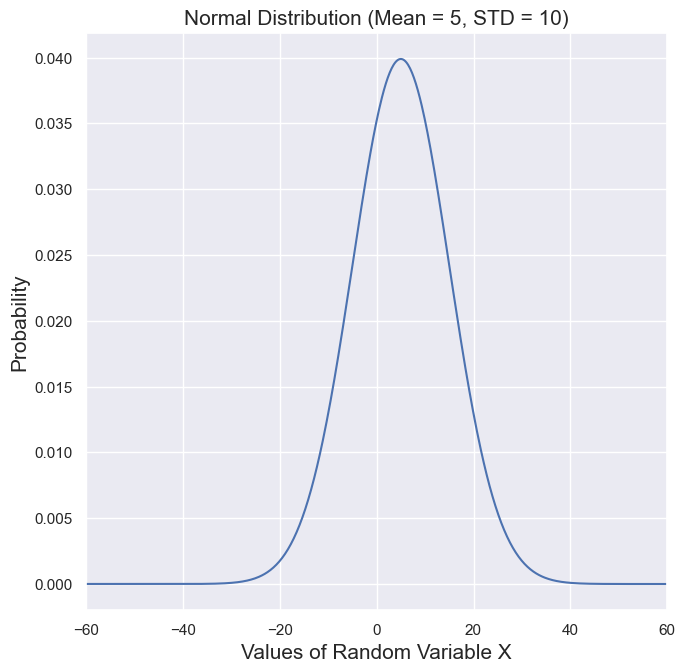

In [35]:
# 2023034 - MAHMUT ZAHID MALKOC
mu = 5   # mean as 5
std = 10 # standard deviation as 10
snd = stats.norm(mu, std)

# Generate 1000 random values between -100, 100
x = np.linspace(-100, 100, 1000)

# Plot the standard normal distribution for different values of random variable
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-60, 60)
plt.title('Normal Distribution (Mean = 5, STD = 10)', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

In [36]:
# 2023034 - MAHMUT ZAHID MALKOC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(housing)
normalized_housing = pd.DataFrame(normalized_data, columns=housing.columns)

normalized_housing

Year  NationalHouseConstructionCostIndex100Base1991  \
0   1.691291                                       1.478047   
1   1.608789                                       1.478047   
2   1.526287                                       1.453639   
3   1.443785                                       1.424794   
4   1.361283                                       1.398167   
5   1.278781                                       1.389292   
6   1.196279                                       1.513550   
7   1.113777                                       1.464734   
8   1.031275                                       1.529082   
9   0.948773                                       1.358227   
10  0.866271                                       1.191810   
11  0.783769                                       1.029831   
12  0.701267                                       0.910011   
13  0.618765                                       0.799066   
14  0.536263                                       0.694778   
15  0.453761                                       0.466232   
16  0.371259                                       0.011359   
17  0.288757                                      -0.210531   
18  0.206255                                      -0.345883   
19  0.123753                                      -0.445733   
20  0.041251                                      -0.536708   
21 -0.041251                                      -0.572210   
22 -0.123753                                      -0.654309   
23 -0.206255                                      -0.735669   
24 -0.288757                                      -0.817028   
25 -0.371259                                      -0.898388   
26 -0.453761                                      -0.898388   
27 -0.536263                                      -0.898388   
28 -0.618765                                      -0.898388   
29 -0.701267                                      -0.898388   
30 -0.783769                                      -0.898388   
31 -0.866271                                      -0.898388   
32 -0.948773                                      -0.898388   
33 -1.031275                                      -0.898388   
34 -1.113777                                      -0.898388   
35 -1.196279                                      -0.898388   
36 -1.278781                                      -0.898388   
37 -1.361283                                      -0.898388   
38 -1.443785                                      -0.898388   
39 -1.526287                                      -0.898388   
40 -1.608789                                      -0.898388   
41 -1.691291                                      -0.898388   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                           -0.418298              
1                                           -0.418298              
2                                           -0.383578              
3                                           -0.383578              
4                                           -0.522459              
5                                           -1.529351              
6                                           -0.209976              
7                                           -1.077986              
8                                            0.727475              
9                                            0.762196              
10                                           0.762196              
11                                           0.449712              
12                                           0.380271              
13                                           0.345551              
14                                           1.630206              
15                                           4.442558              
16                                           2.046851              
17                                           1.109400              
18    

## STATISTICAL VISUALIZATION

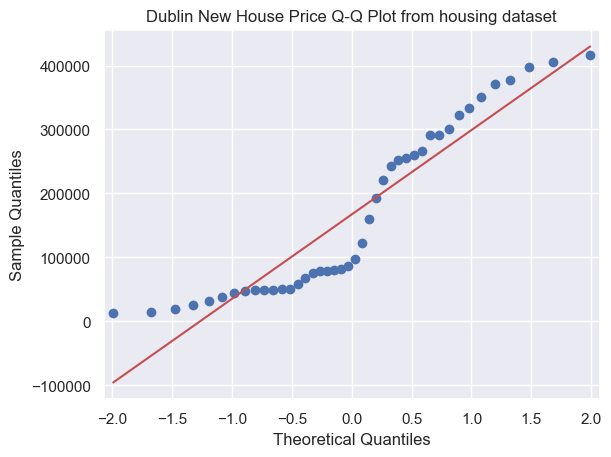

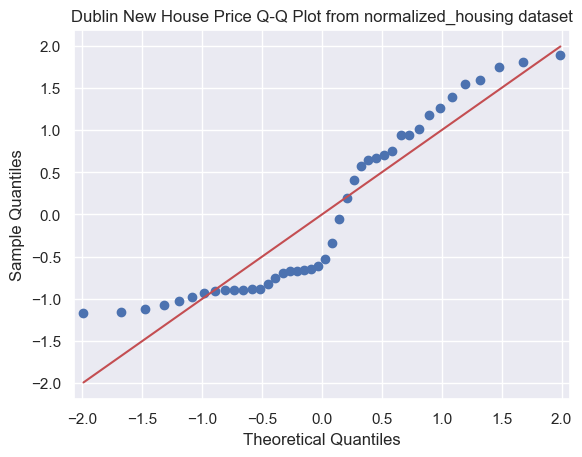

In [37]:
# 2023034 - MAHMUT ZAHID MALKOC
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.qqplot(housing["DublinNewHousePrice€"], line="s")
plt.title("Dublin New House Price Q-Q Plot from housing dataset")
plt.show()

sm.qqplot(normalized_housing["DublinNewHousePrice€"], line="s")
plt.title("Dublin New House Price Q-Q Plot from normalized_housing dataset")
plt.show()


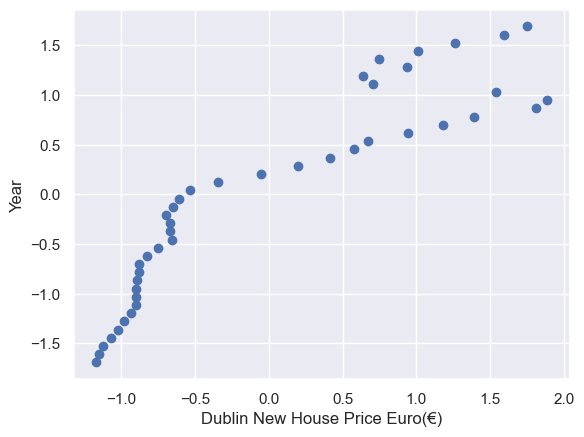

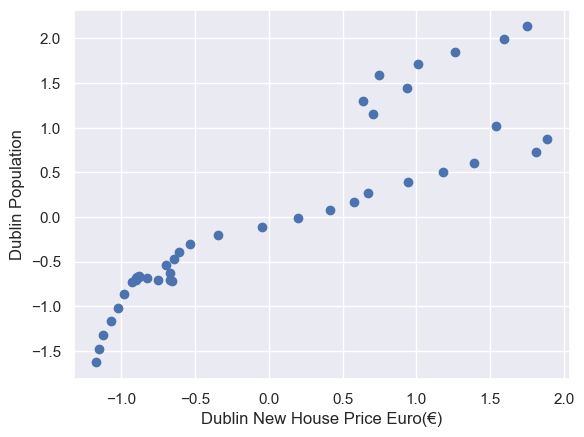

'\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEUrbanPopulation"])\nplt.xlabel("DublinNewHousePrice€")\nplt.ylabel("IEUrbanPopulation")\nplt.show()\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEMigrantPopulation"])\nplt.xlabel("DublinNewHousePrice€")\nplt.ylabel("IEMigrantPopulation")\nplt.show()\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEInflationRate"])\nplt.xlabel("DublinNewHousePrice€")\nplt.ylabel("IEInflationRate")\nplt.show()\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEInflationAnnualChangeRate"])\nplt.xlabel("DublinNewHousePrice€")\nplt.ylabel("IEInflationAnnualChangeRate")\nplt.show()\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEGDP$B"])\nplt.xlabel("DublinNewHousePrice€")\nplt.ylabel("IEGDP$B")\nplt.show()\nplt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEGDPPerCapita$"])\nplt.xl

In [38]:
# 2023034 - MAHMUT ZAHID MALKOC
import matplotlib.pyplot as plt

plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["Year"])
plt.xlabel("Dublin New House Price Euro(€)")
plt.ylabel("Year")
plt.show()
'''
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["NationalHouseConstructionCostIndex100Base1991"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("NationalHouseConstructionCostIndex100Base1991")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["NationalHouseConstructionCostIndexIncreaseonPreviousYearRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("NationalHouseConstructionCostIndexIncreaseonPreviousYearRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["NationalNewHousePrice€"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("NationalNewHousePrice€")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEPopulation"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEPopulation")
plt.show()
'''
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["DublinPopulation"])
plt.xlabel("Dublin New House Price Euro(€)")
plt.ylabel("Dublin Population")
plt.show()
'''
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEUrbanPopulation"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEUrbanPopulation")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEMigrantPopulation"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEMigrantPopulation")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEInflationRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEInflationRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEInflationAnnualChangeRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEInflationAnnualChangeRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEGDP$B"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEGDP$B")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEGDPPerCapita$"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEGDPPerCapita$")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEGDPGrowthRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEGDPGrowthRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEUnemploymentRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEUnemploymentRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IEUnemploymentRateAnnualChangeRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IEUnemploymentRateAnnualChangeRate")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IERefugeesGrantedAsylum"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IERefugeesGrantedAsylum")
plt.show()
plt.scatter(normalized_housing["DublinNewHousePrice€"], normalized_housing["IERefugeesGrantedAsylumAnnualChangeRate"])
plt.xlabel("DublinNewHousePrice€")
plt.ylabel("IERefugeesGrantedAsylumAnnualChangeRate")
plt.show()
'''

In [39]:
# 2023034 - MAHMUT ZAHID MALKOC
normalized_housing_V1 = normalized_housing.drop(["Year"], axis=1)
normalized_housing_V1.head()

NationalHouseConstructionCostIndex100Base1991  \
0                                       1.478047   
1                                       1.478047   
2                                       1.453639   
3                                       1.424794   
4                                       1.398167   

   NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                          -0.418298              
1                                          -0.418298              
2                                          -0.383578              
3                                          -0.383578              
4                                          -0.522459              

   DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
0              1.747292                1.770093      1.918802   
1              1.596144                1.452084      1.812181   
2              1.262376                1.104278      1.719275   
3              1.010244                0.924075      1.648231   
4              0.746140                0.846674      1.596480   

   DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  IEInflationRate  \
0          2.134305           1.922160             1.685094        -0.892826   
1          1.991617           1.808866             1.685094        -0.942848   
2          1.848930           1.711359             1.647954        -0.864480   
3          1.717218           1.631107             1.647954        -0.809455   
4          1.585506           1.567002             1.647954        -0.611031   

   IEInflationAnnualChangeRate   IEGDP$B  IEGDPPerCapita$  IEGDPGrowthRate  \
0                     0.248820  1.933615         1.754973        -0.593343   
1                    -0.023308  1.858022         1.714162         4.157043   
2                     0.026169  1.520802         1.403423         0.817326   
3                    -0.277766  1.305399         1.204843        -0.780299   
4                    -0.161140  1.173965         1.084105        -1.022492   

   IEUnemploymentRate  IEUnemploymentRateAnnualChangeRate  \
0           -0.796264                           -0.776000   
1           -0.459229                           -1.076151   
2           -0.032463                           -1.017585   
3            0.376794                           -0.907774   
4            0.753223                            0.424604   

   IERefugeesGrantedAsylum  IERefugeesGrantedAsylumAnnualChangeRate  
0                 0.801848                                -0.364821  
1                 0.918811                                -0.258395  
2                 0.835610                                -0.329282  
3                 0.883541                                -0.352238  
4                 0.979403                                -0.528398

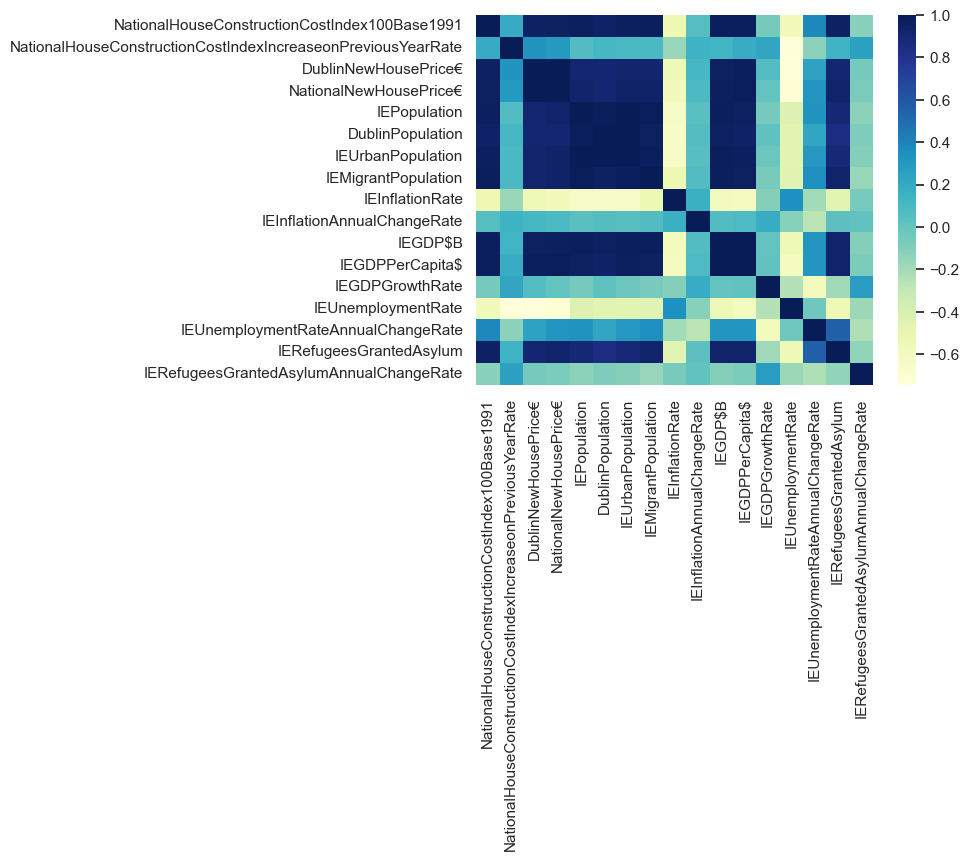

In [40]:
# 2023034 - MAHMUT ZAHID MALKOC
import seaborn as sns

corr_matrix = normalized_housing_V1.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [41]:
# 2023034 - MAHMUT ZAHID MALKOC
new_normalized_housing = normalized_housing_V1.drop(["IEInflationRate","IEUnemploymentRate",
                                                     "IERefugeesGrantedAsylumAnnualChangeRate"], axis=1)
new_normalized_housing.head()

NationalHouseConstructionCostIndex100Base1991  \
0                                       1.478047   
1                                       1.478047   
2                                       1.453639   
3                                       1.424794   
4                                       1.398167   

   NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                          -0.418298              
1                                          -0.418298              
2                                          -0.383578              
3                                          -0.383578              
4                                          -0.522459              

   DublinNewHousePrice€  NationalNewHousePrice€  IEPopulation  \
0              1.747292                1.770093      1.918802   
1              1.596144                1.452084      1.812181   
2              1.262376                1.104278      1.719275   
3              1.010244                0.924075      1.648231   
4              0.746140                0.846674      1.596480   

   DublinPopulation  IEUrbanPopulation  IEMigrantPopulation  \
0          2.134305           1.922160             1.685094   
1          1.991617           1.808866             1.685094   
2          1.848930           1.711359             1.647954   
3          1.717218           1.631107             1.647954   
4          1.585506           1.567002             1.647954   

   IEInflationAnnualChangeRate   IEGDP$B  IEGDPPerCapita$  IEGDPGrowthRate  \
0                     0.248820  1.933615         1.754973        -0.593343   
1                    -0.023308  1.858022         1.714162         4.157043   
2                     0.026169  1.520802         1.403423         0.817326   
3                    -0.277766  1.305399         1.204843        -0.780299   
4                    -0.161140  1.173965         1.084105        -1.022492   

   IEUnemploymentRateAnnualChangeRate  IERefugeesGrantedAsylum  
0                           -0.776000                 0.801848  
1                           -1.076151                 0.918811  
2                           -1.017585                 0.835610  
3                           -0.907774                 0.883541  
4                            0.424604                 0.979403

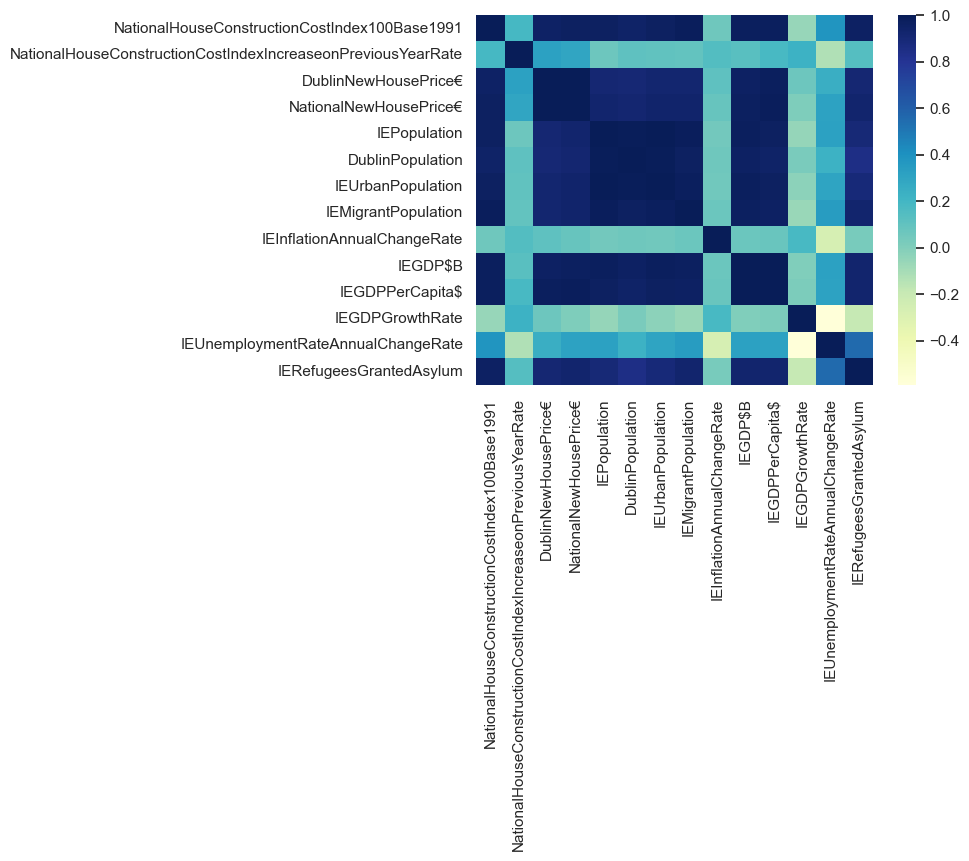

In [42]:
# 2023034 - MAHMUT ZAHID MALKOC
corr_matrix = new_normalized_housing.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

### DATA PREPARATION AND VISUALIZATION

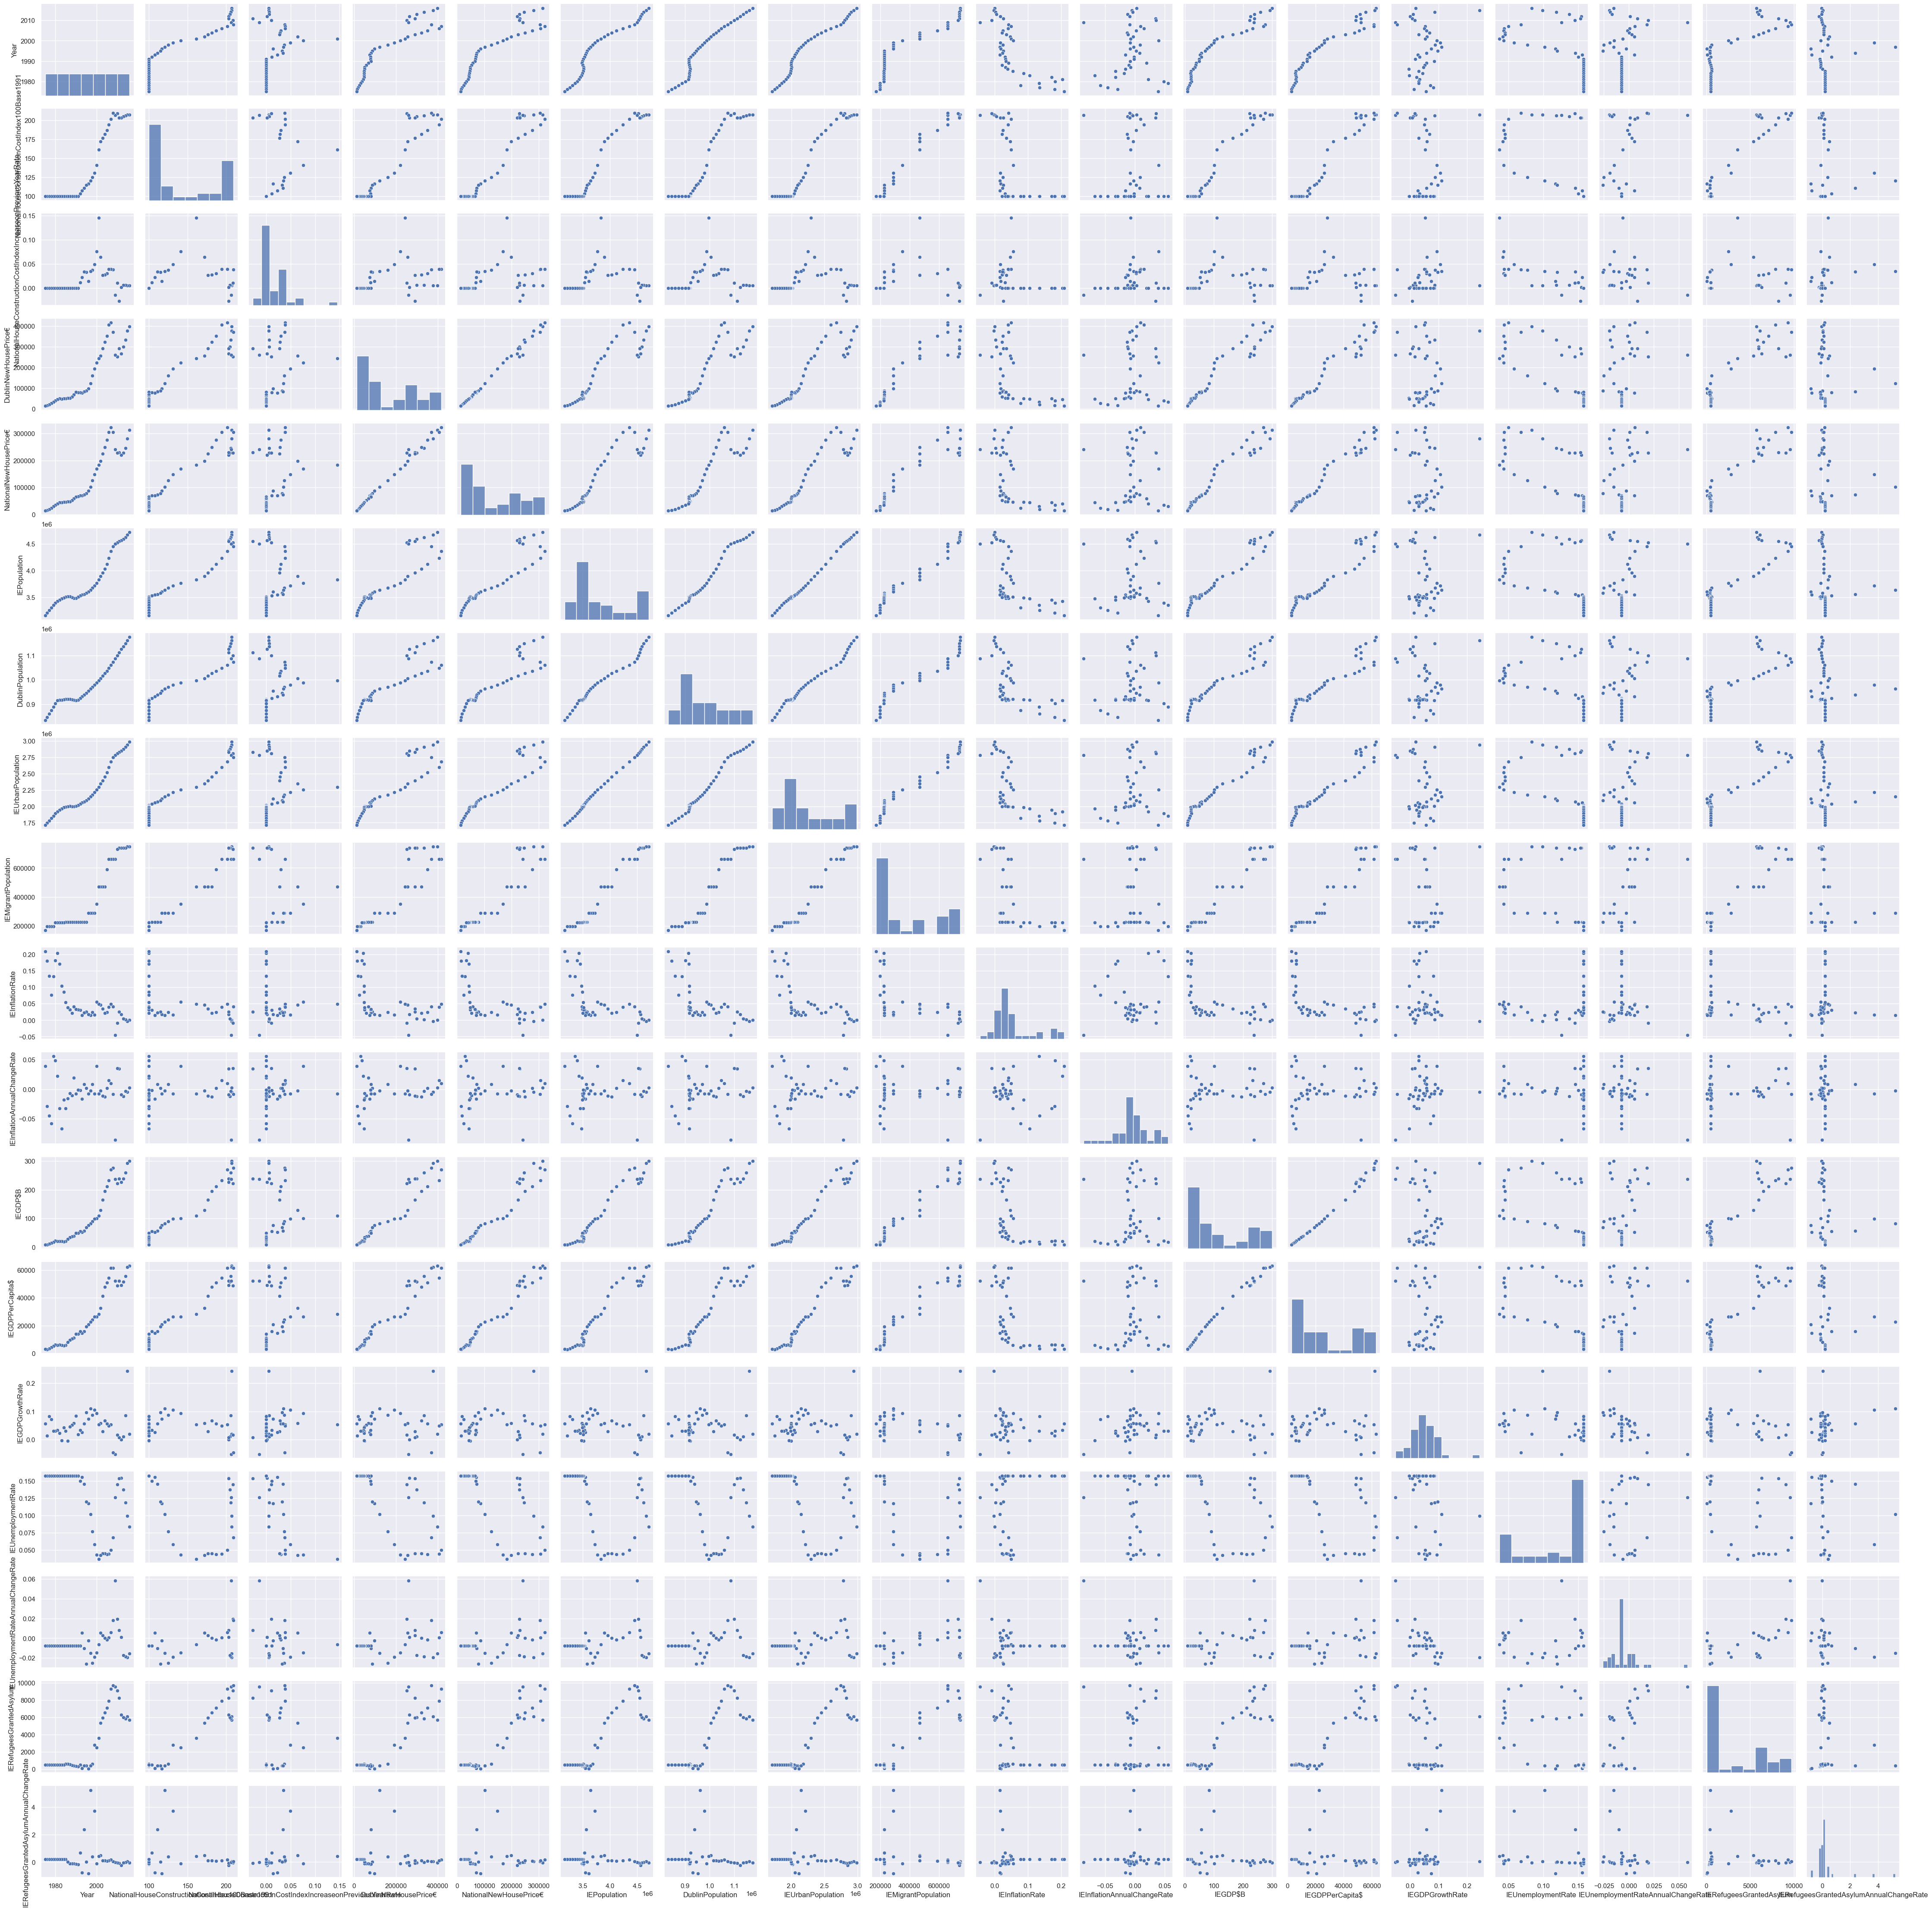

In [43]:
# 2023034 - MAHMUT ZAHID MALKOC
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(housing)

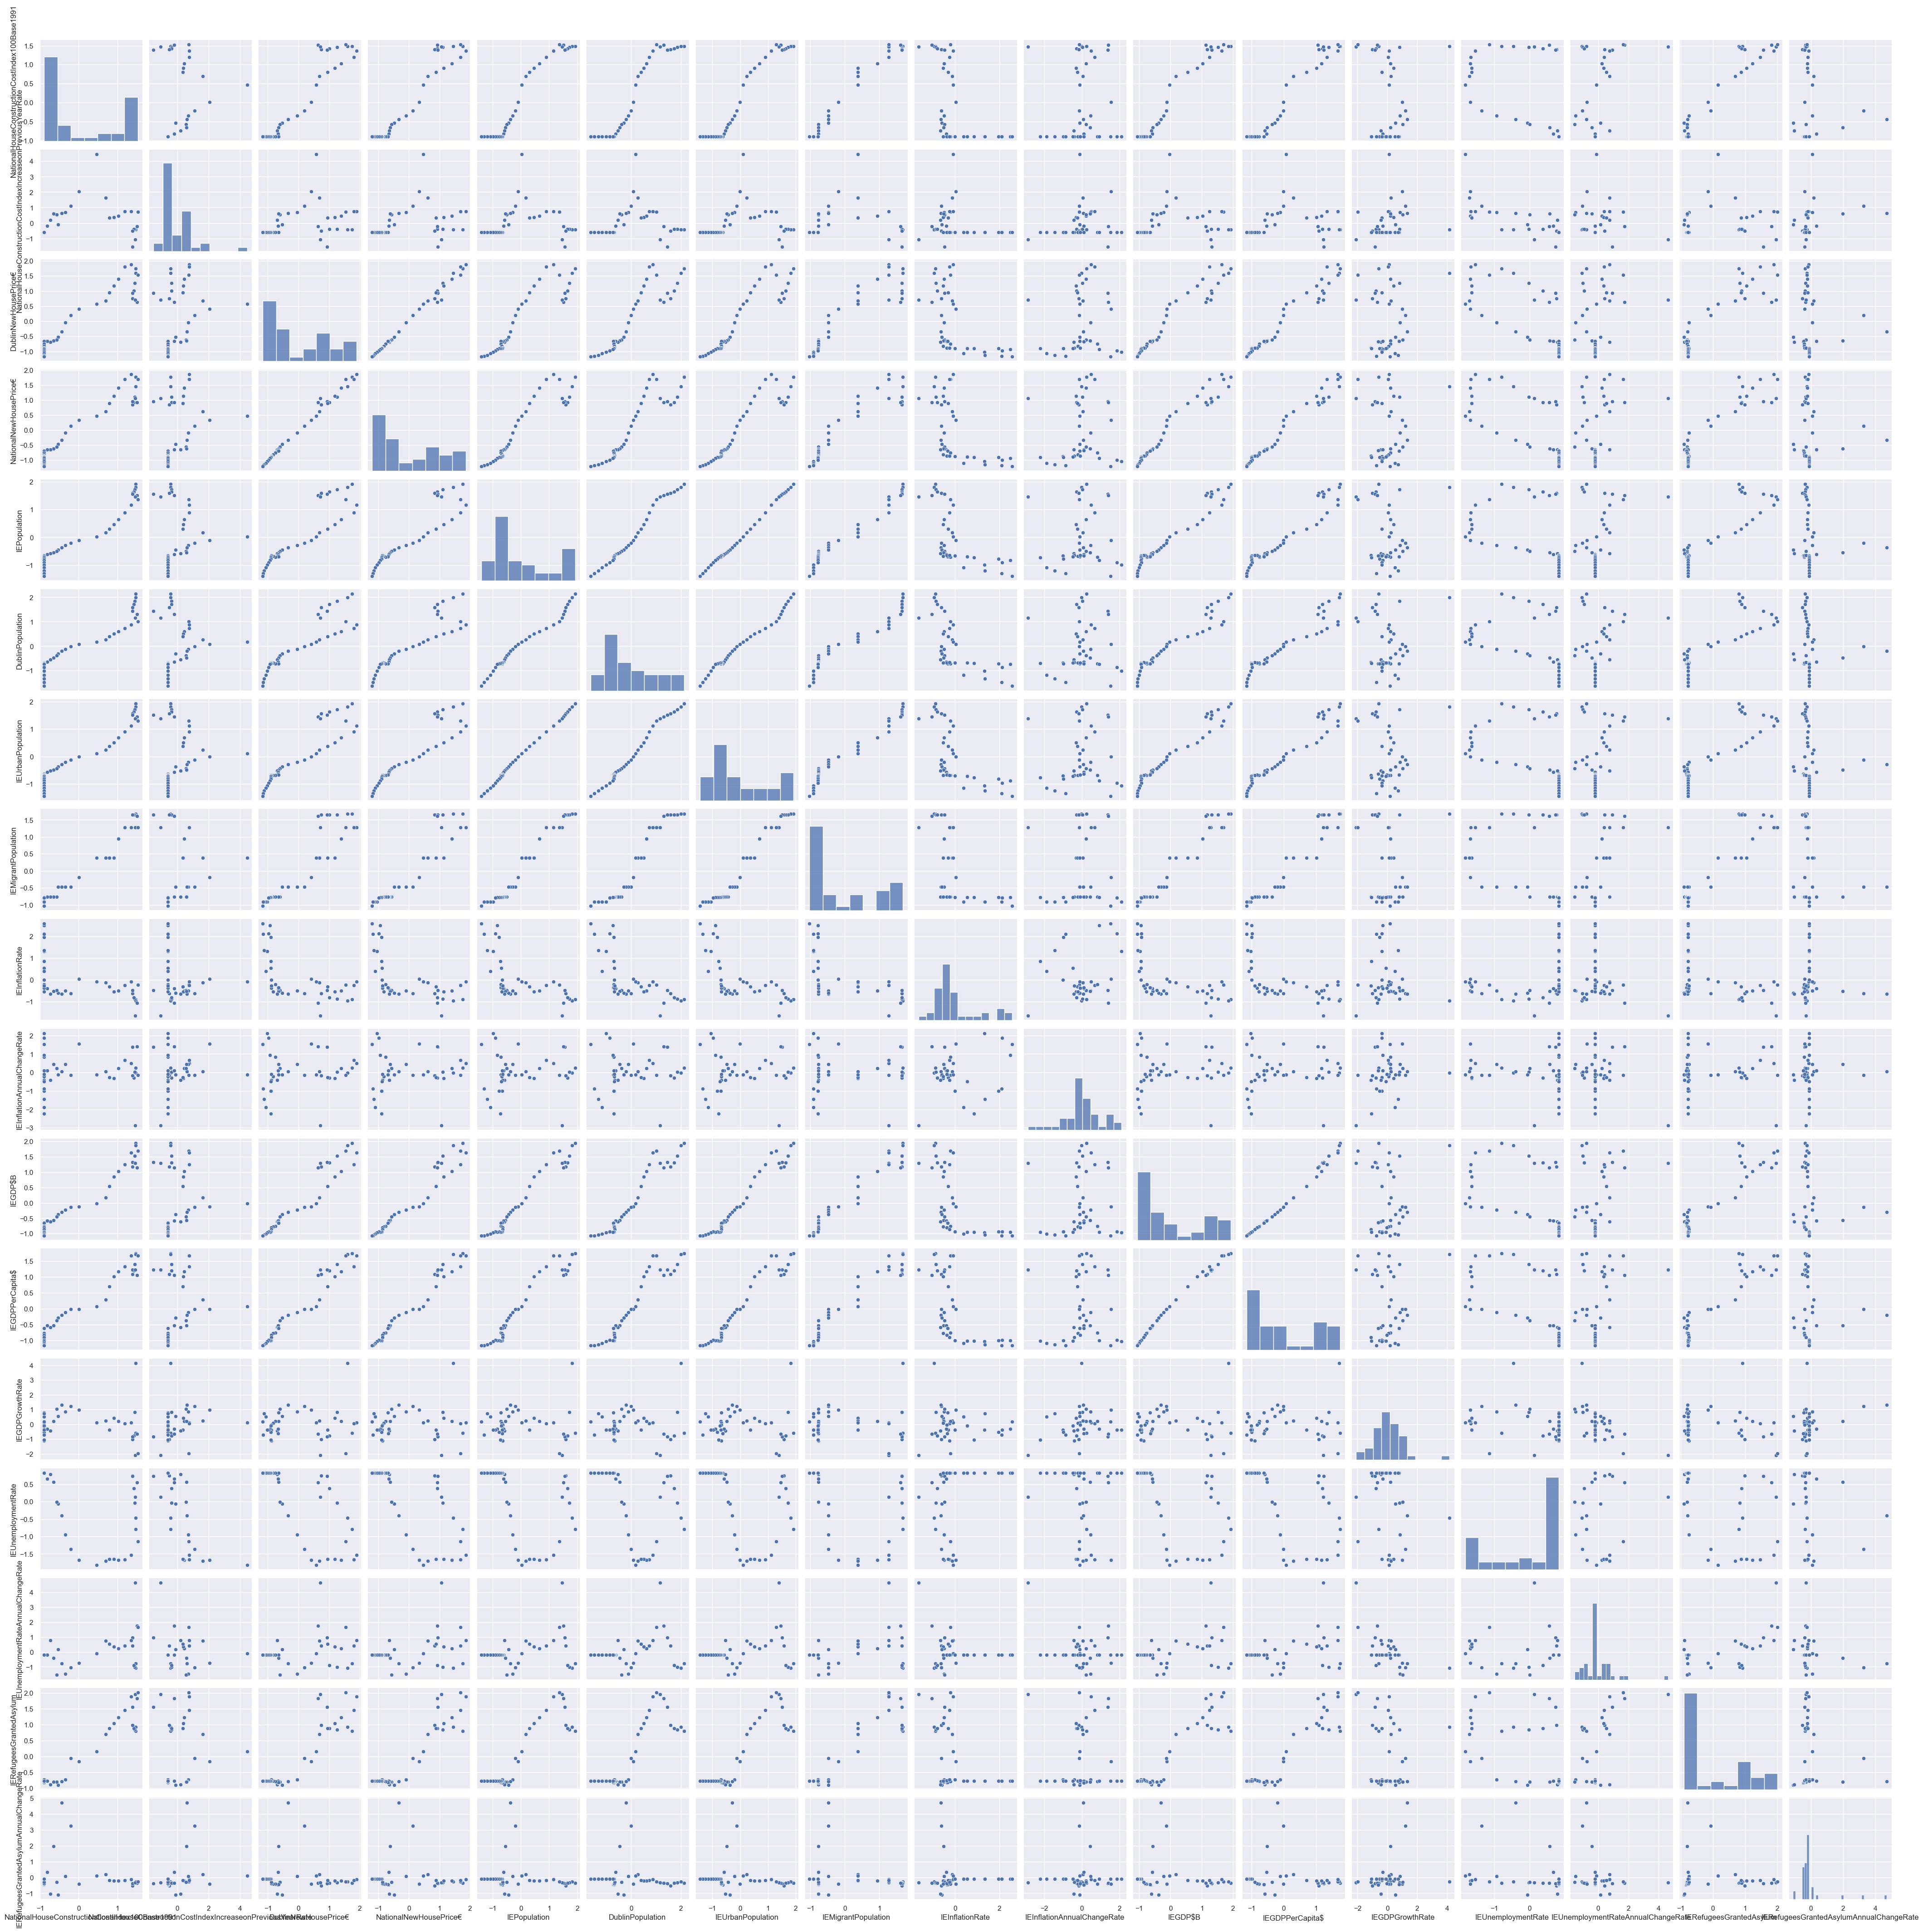

In [44]:
# 2023034 - MAHMUT ZAHID MALKOC
sns.pairplot(normalized_housing_V1)

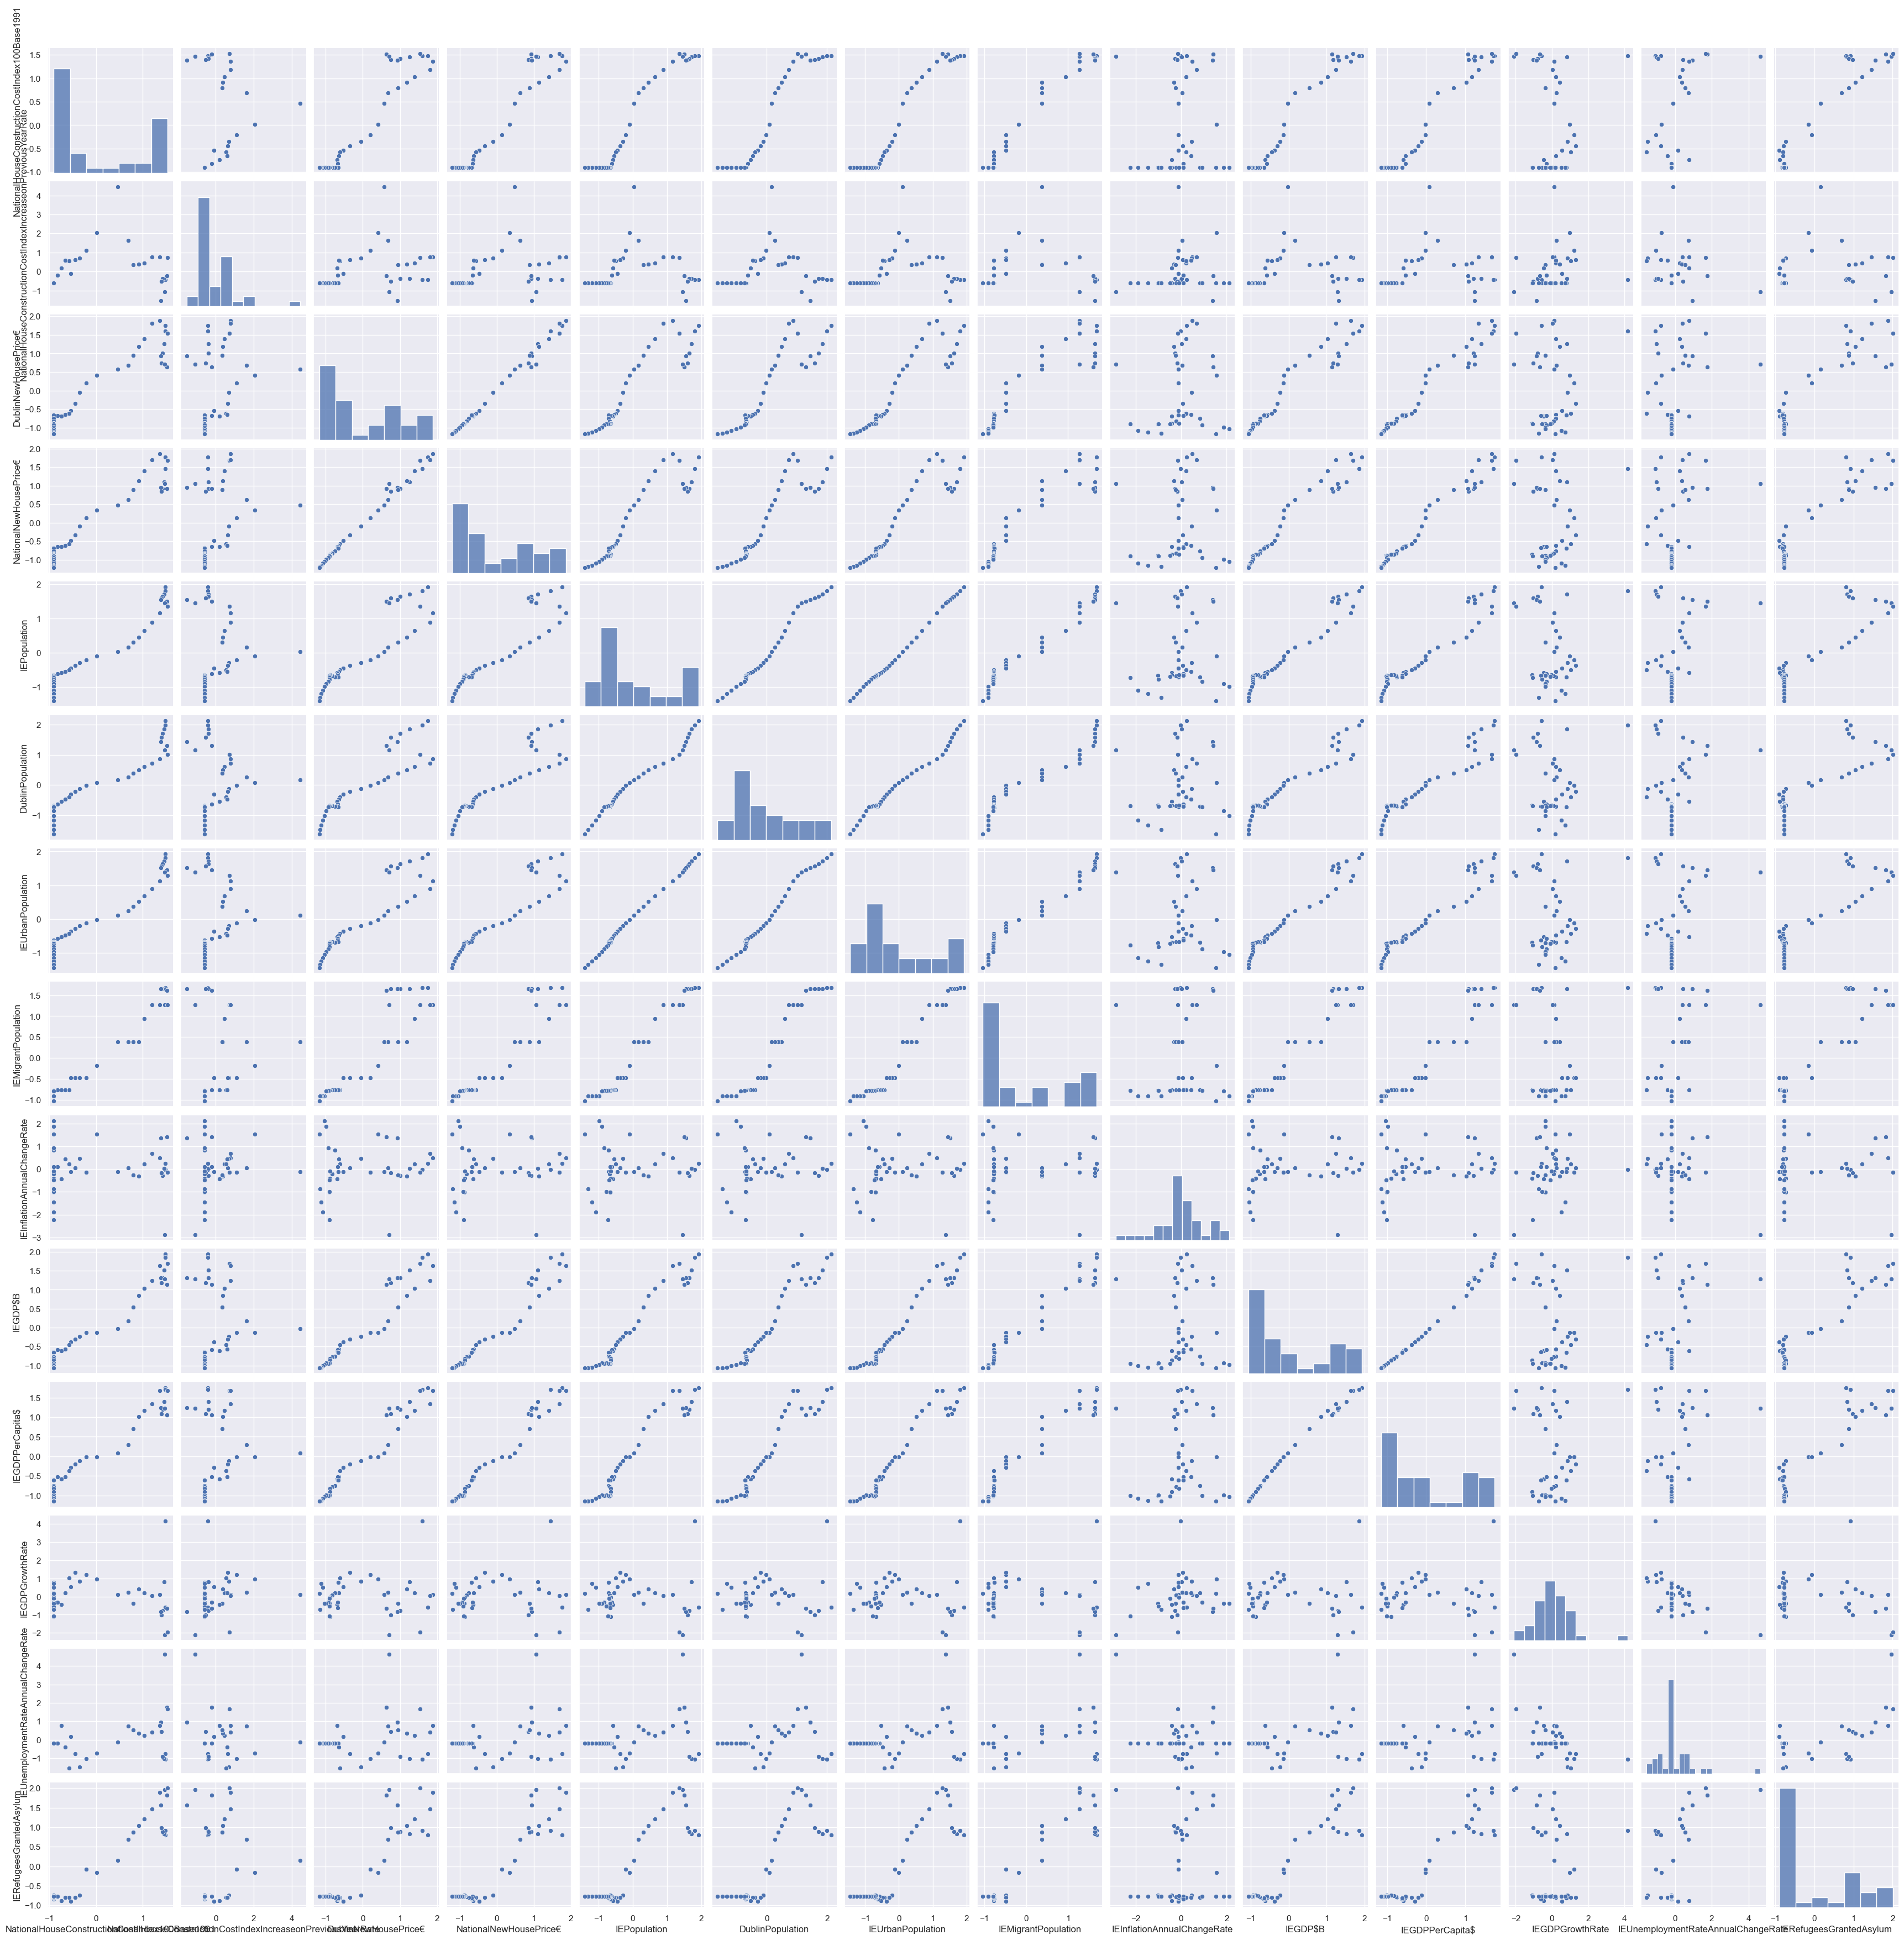

In [45]:
# 2023034 - MAHMUT ZAHID MALKOC
sns.pairplot(new_normalized_housing)

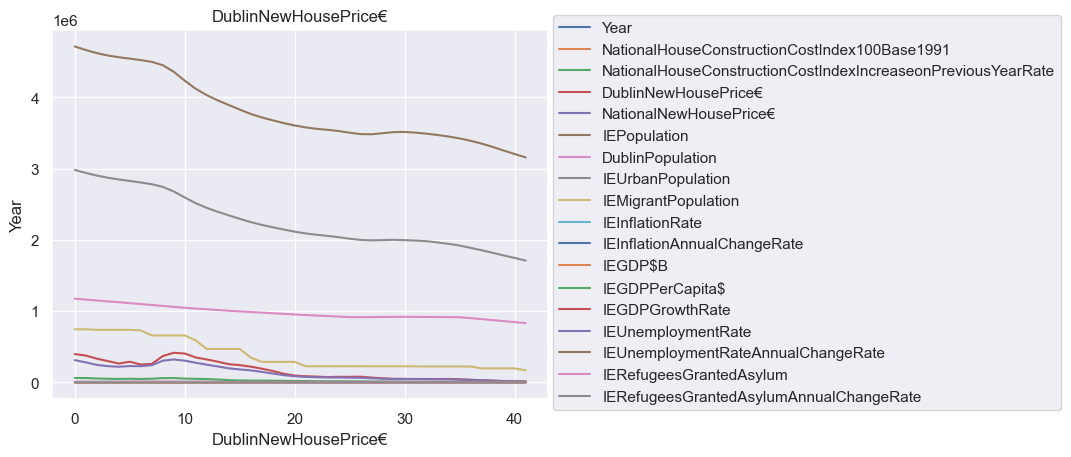

In [44]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.plot(kind="line", title="DublinNewHousePrice€")
plt.ylabel("Year")
plt.xlabel("DublinNewHousePrice€")
plt.legend(loc='upper right', bbox_to_anchor=(2.05, 1.06))
plt.show()

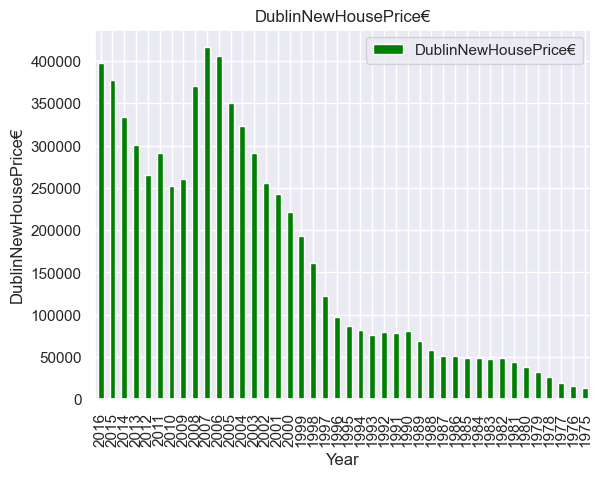

In [45]:
# 2023034 - MAHMUT ZAHID MALKOC
housing.plot("Year","DublinNewHousePrice€",kind="bar", title="DublinNewHousePrice€", color ='green', width = 0.5)
plt.xlabel("Year")
plt.ylabel("DublinNewHousePrice€")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot:xlabel='DublinNewHousePrice€'>

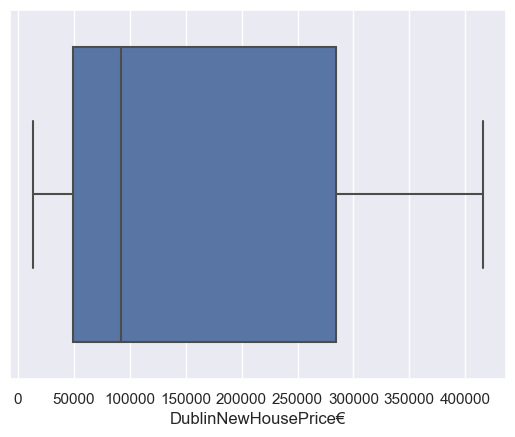

In [46]:
# 2023034 - MAHMUT ZAHID MALKOC
sns.boxplot(x=housing["DublinNewHousePrice€"])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DublinNewHousePrice', ylabel='Density'>

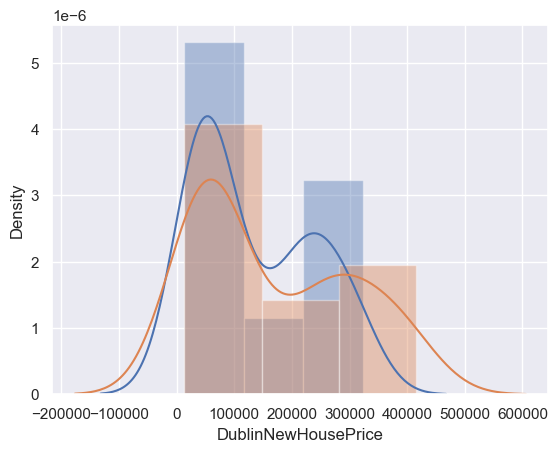

In [47]:
# 2023034 - MAHMUT ZAHID MALKOC
housing = housing.rename(columns={"NationalNewHousePrice€": "NationalNewHousePrice", 
                        "DublinNewHousePrice€": "DublinNewHousePrice"})
sns.distplot(housing.NationalNewHousePrice)
sns.distplot(housing.DublinNewHousePrice)

In [48]:
# 2023034 - MAHMUT ZAHID MALKOC
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3-Q1
print(IQR)
new_housing_shape = housing[~((housing < (Q1-1.5 * IQR)) |(housing > (Q3 + 1.5 * IQR))).any(axis=1)]
new_housing_shape.shape

Year                                                                20.500000
NationalHouseConstructionCostIndex100Base1991                       92.375000
NationalHouseConstructionCostIndexIncreaseonPreviousYearRate         0.032250
DublinNewHousePrice                                             234818.750000
NationalNewHousePrice                                           181310.750000
IEPopulation                                                    719645.250000
DublinPopulation                                                128000.000000
IEUrbanPopulation                                               583827.750000
IEMigrantPopulation                                             416487.500000
IEInflationRate                                                      0.036975
IEInflationAnnualChangeRate                                          0.021425
IEGDP$B                                                            195.912500
IEGDPPerCapita$                                                 

(19, 18)

NationalHouseConstructionCostIndex100Base1991  \
NationalHouseConstructionCostIndex100Base1991                                            1.000000   
NationalHouseConstructionCostIndexIncreaseonPre...                                       0.189000   
DublinNewHousePrice€                                                                     0.952382   
NationalNewHousePrice€                                                                   0.964535   
IEPopulation                                                                             0.966369   
DublinPopulation                                                                         0.945792   
IEUrbanPopulation                                                                        0.966501   
IEMigrantPopulation                                                                      0.983494   
IEInflationRate                                                                         -0.540199   
IEInflationAnnualChangeRate                                                              0.058654   
IEGDP$B                                                                                  0.979187   
IEGDPPerCapita$                                                                          0.976823   
IEGDPGrowthRate                                                                         -0.058132   
IEUnemploymentRate                                                                      -0.570300   
IEUnemploymentRateAnnualChangeRate                                                       0.383734   
IERefugeesGrantedAsylum                                                                  0.957782   
IERefugeesGrantedAsylumAnnualChangeRate                                                 -0.118361   

                                                    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
NationalHouseConstructionCostIndex100Base1991                                                0.189000              
NationalHouseConstructionCostIndexIncreaseonPre...                                           1.000000              
DublinNewHousePrice€                                                                         0.320568              
NationalNewHousePrice€                                                                       0.295757              
IEPopulation                                                                                 0.066898              
DublinPopulation                                                                             0.108595              
IEUrbanPopulation                                                                            0.100280              
IEMigrantPopulation                                                                          0.095526              
IEInflationRate                                                                             -0.168263              
IEInflationAnnualChangeRate                                                                  0.146396              
IEGDP$B                                                                                      0.128169              
IEGDPPerCapita$                                                                              0.185323              
IEGDPGrowthRate                                                                              0.227986              
IEUnemploymentRate                                                                          -0.744732              
IEUnemploymentRateAnnualChangeRate                                                          -0.127832              
IERefugeesGrantedAsylum                                                                      0.139824              
IERefugeesGrantedAsylumAnnualChangeRate                                                      0.253332              

                                                    DublinNewHousePrice€  \
NationalHouseConstructionCostIndex100Base1991                   0.95

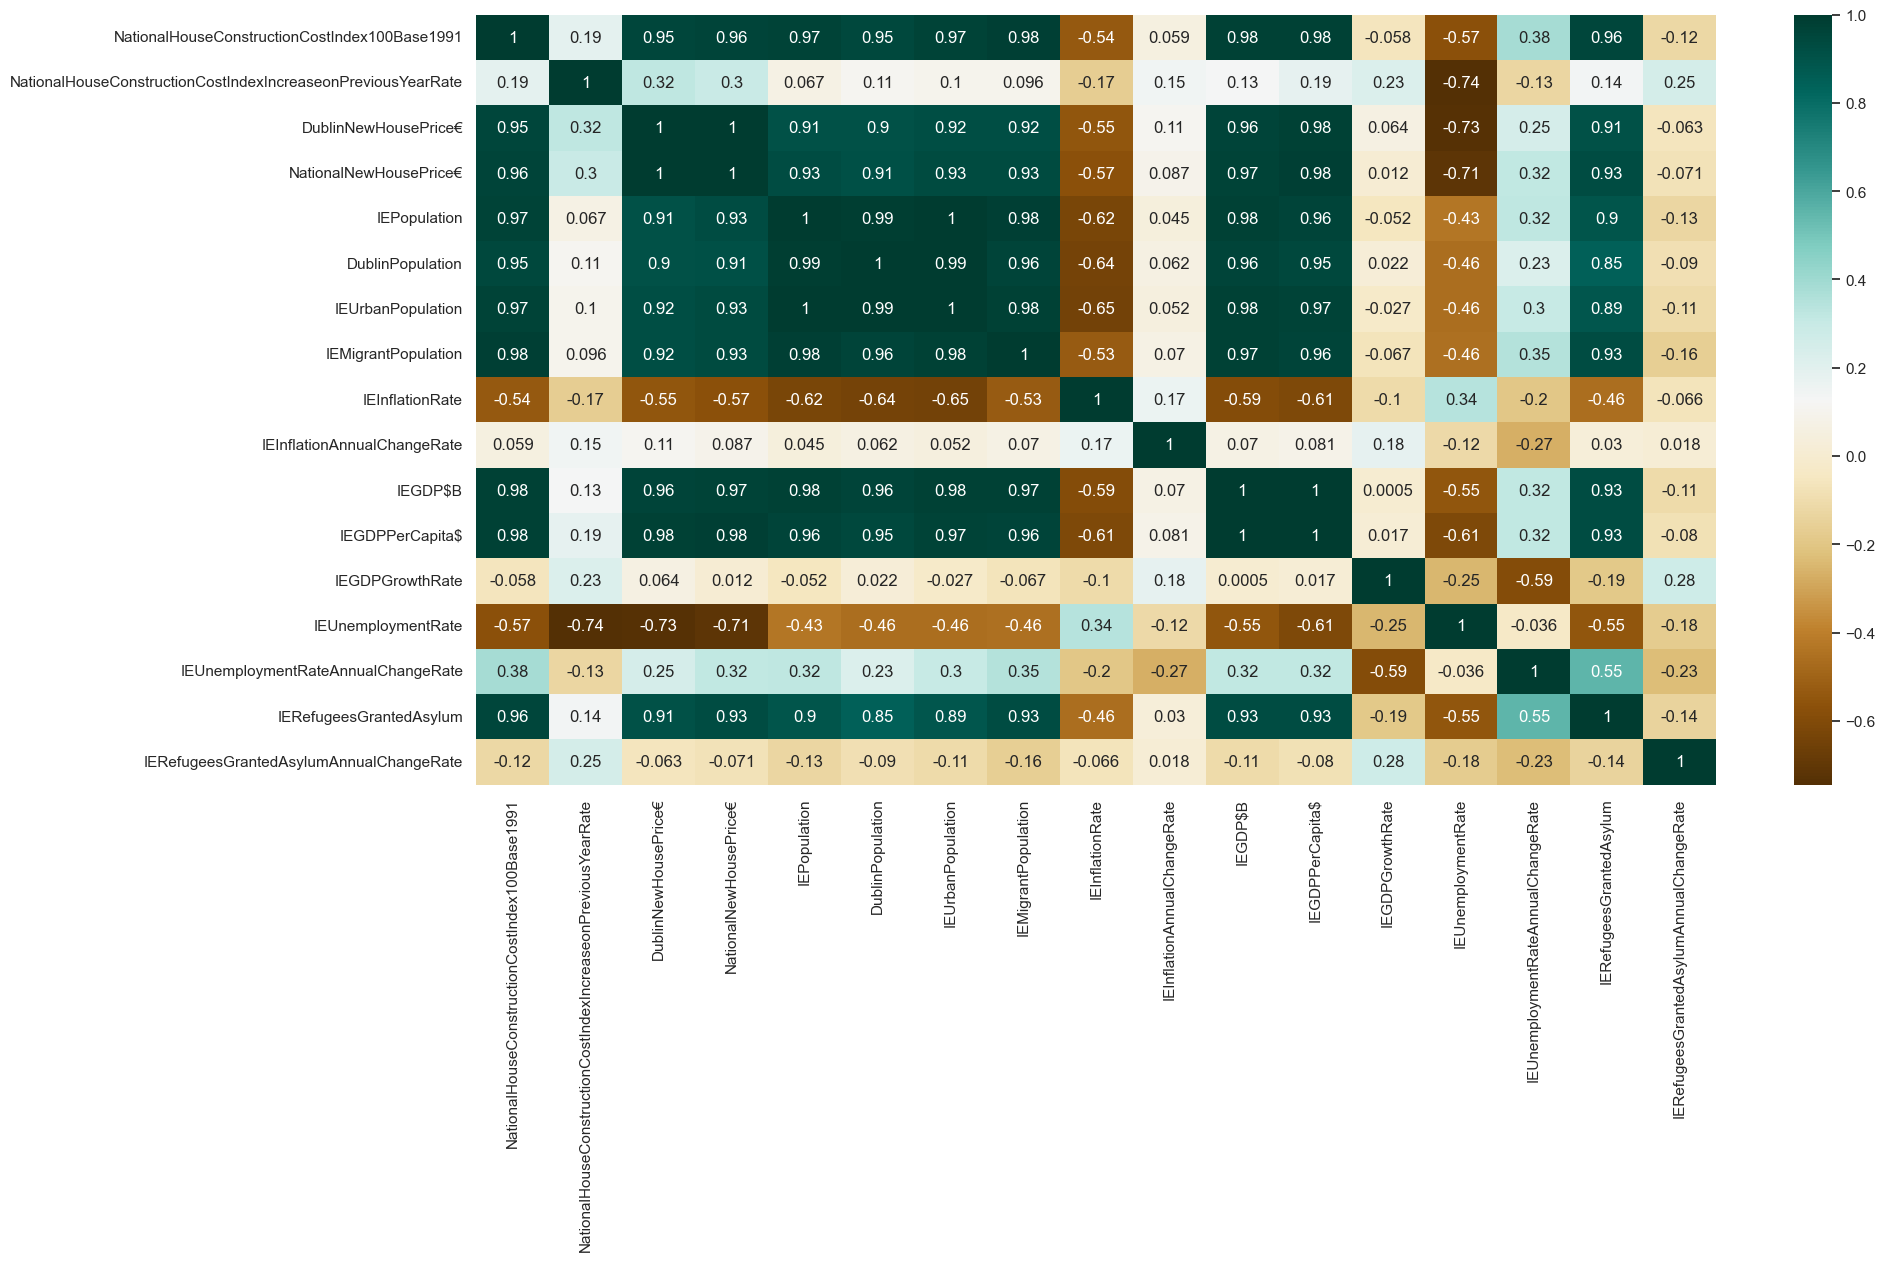

In [49]:
# 2023034 - MAHMUT ZAHID MALKOC
plt.figure(figsize=(20,10))
c= normalized_housing_V1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c 

NationalHouseConstructionCostIndex100Base1991  \
NationalHouseConstructionCostIndex100Base1991                                            1.000000   
NationalHouseConstructionCostIndexIncreaseonPre...                                       0.189000   
DublinNewHousePrice€                                                                     0.952382   
NationalNewHousePrice€                                                                   0.964535   
IEPopulation                                                                             0.966369   
DublinPopulation                                                                         0.945792   
IEUrbanPopulation                                                                        0.966501   
IEMigrantPopulation                                                                      0.983494   
IEInflationAnnualChangeRate                                                              0.058654   
IEGDP$B                                                                                  0.979187   
IEGDPPerCapita$                                                                          0.976823   
IEGDPGrowthRate                                                                         -0.058132   
IEUnemploymentRateAnnualChangeRate                                                       0.383734   
IERefugeesGrantedAsylum                                                                  0.957782   

                                                    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
NationalHouseConstructionCostIndex100Base1991                                                0.189000              
NationalHouseConstructionCostIndexIncreaseonPre...                                           1.000000              
DublinNewHousePrice€                                                                         0.320568              
NationalNewHousePrice€                                                                       0.295757              
IEPopulation                                                                                 0.066898              
DublinPopulation                                                                             0.108595              
IEUrbanPopulation                                                                            0.100280              
IEMigrantPopulation                                                                          0.095526              
IEInflationAnnualChangeRate                                                                  0.146396              
IEGDP$B                                                                                      0.128169              
IEGDPPerCapita$                                                                              0.185323              
IEGDPGrowthRate                                                                              0.227986              
IEUnemploymentRateAnnualChangeRate                                                          -0.127832              
IERefugeesGrantedAsylum                                                                      0.139824              

                                                    DublinNewHousePrice€  \
NationalHouseConstructionCostIndex100Base1991                   0.952382   
NationalHouseConstructionCostIndexIncreaseonPre...              0.320568   
DublinNewHousePrice€                                            1.000000   
NationalNewHousePrice€                                          0.995771   
IEPopulation                                                    0.911105   
DublinPopulation                                                0.904875   
IEUrbanPopulation                                               0.919784   
IEMigrantPopulation                                             0.921716   
IEInflationAnnualChangeRate                                     0.107456   
IEGDP$B                            

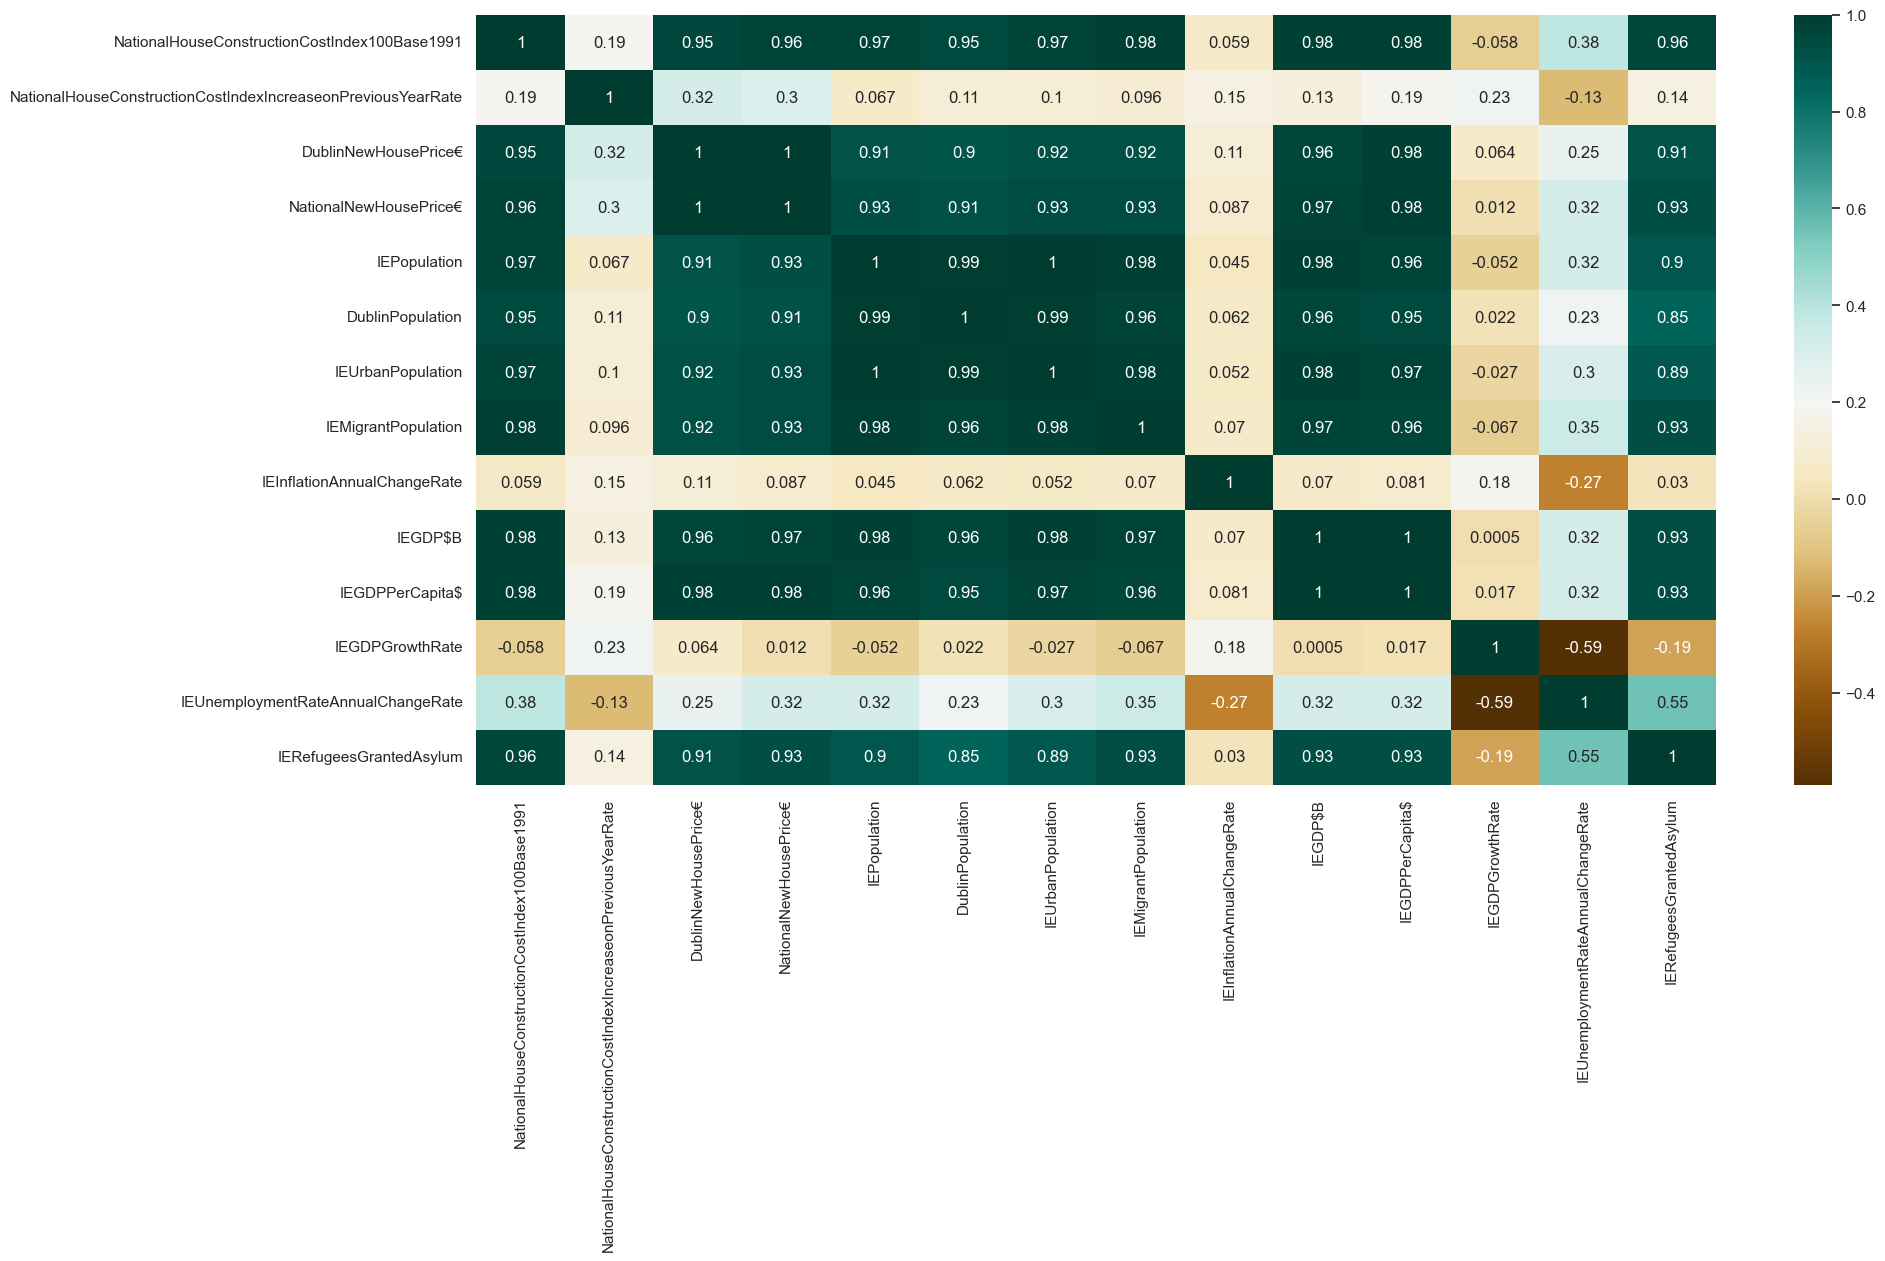

In [50]:
# 2023034 - MAHMUT ZAHID MALKOC
plt.figure(figsize=(20,10))
c= new_normalized_housing.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c 

# MACHINE LEARNING

In [51]:
# 2023034 - MAHMUT ZAHID MALKOC
housing

Year  NationalHouseConstructionCostIndex100Base1991  \
0   2016                                     207.100000   
1   2015                                     207.100000   
2   2014                                     206.000000   
3   2013                                     204.700000   
4   2012                                     203.500000   
5   2011                                     203.100000   
6   2010                                     208.700000   
7   2009                                     206.500000   
8   2008                                     209.400000   
9   2007                                     201.700000   
10  2006                                     194.200000   
11  2005                                     186.900000   
12  2004                                     181.500000   
13  2003                                     176.500000   
14  2002                                     171.800000   
15  2001                                     161.500000   
16  2000                                     141.000000   
17  1999                                     131.000000   
18  1998                                     124.900000   
19  1997                                     120.400000   
20  1996                                     116.300000   
21  1995                                     114.700000   
22  1994                                     111.000000   
23  1993                                     107.333333   
24  1992                                     103.666667   
25  1991                                     100.000000   
26  1990                                     100.000000   
27  1989                                     100.000000   
28  1988                                     100.000000   
29  1987                                     100.000000   
30  1986                                     100.000000   
31  1985                                     100.000000   
32  1984                                     100.000000   
33  1983                                     100.000000   
34  1982                                     100.000000   
35  1981                                     100.000000   
36  1980                                     100.000000   
37  1979                                     100.000000   
38  1978                                     100.000000   
39  1977                                     100.000000   
40  1976                                     100.000000   
41  1975                                     100.000000   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
0                                            0.005000              
1                                            0.005000              
2                                            0.006000              
3                                            0.006000              
4                                            0.002000              
5                                           -0.027000              
6                                            0.011000              
7                                           -0.014000              
8                                            0.038000              
9                                            0.039000              
10                                           0.039000              
11                                           0.030000              
12                                           0.028000              
13                                           0.027000              
14                                           0.064000              
15                                           0.145000              
16                                           0.076000              
17                                           0.049000              
18                                           0.037000              
19                                           0.035000              
20                                    

In [52]:
# 2023034 - MAHMUT ZAHID MALKOC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [53]:
# 2023034 - MAHMUT ZAHID MALKOC
len(housing.index)

42

In [54]:
# 2023034 - MAHMUT ZAHID MALKOC
df = housing.loc[:, ['DublinNewHousePrice', 'IEUrbanPopulation',]]
df = df.rename(columns={'DublinNewHousePrice': 'DNHP', 'IEUrbanPopulation':'IEUP'})
df.head()

DNHP     IEUP
0  397676  2983355
1  377741  2940510
2  333720  2903635
3  300466  2873286
4  265633  2849043

In [55]:
# 2023034 - MAHMUT ZAHID MALKOC
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df.columns = df_columns

df.head()

DNHP      IEUP
0  0.953983  1.000000
1  0.904527  0.966335
2  0.795318  0.937360
3  0.712820  0.913513
4  0.626404  0.894465

<AxesSubplot:xlabel='DNHP', ylabel='IEUP'>

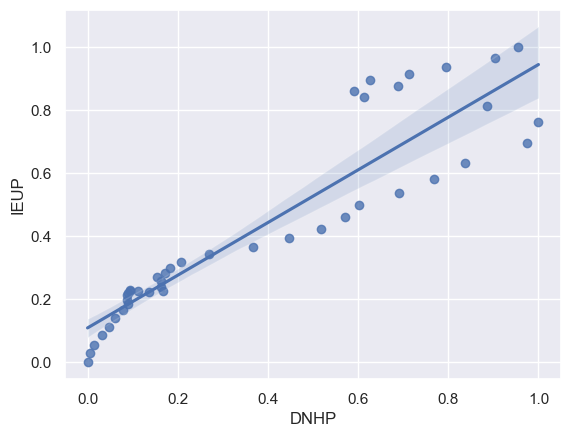

In [56]:
# 2023034 - MAHMUT ZAHID MALKOC
sns.regplot(x="DNHP", y="IEUP", data=df, fit_reg=True)

In [57]:
# 2023034 - MAHMUT ZAHID MALKOC
df_train, df_test = train_test_split(df, train_size = 0.6, 
                                         test_size = 0.4, 
                                         random_state = 10)
print(len(df_train))
print(len(df_test))

25
17


In [58]:
# 2023034 - MAHMUT ZAHID MALKOC
X_train = df_train['DNHP']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['IEUP']

X_test = df_test['DNHP']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['IEUP']

len(X_train)

25

In [59]:
# 2023034 - MAHMUT ZAHID MALKOC
degrees = [1, 2, 3, 5, 10]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

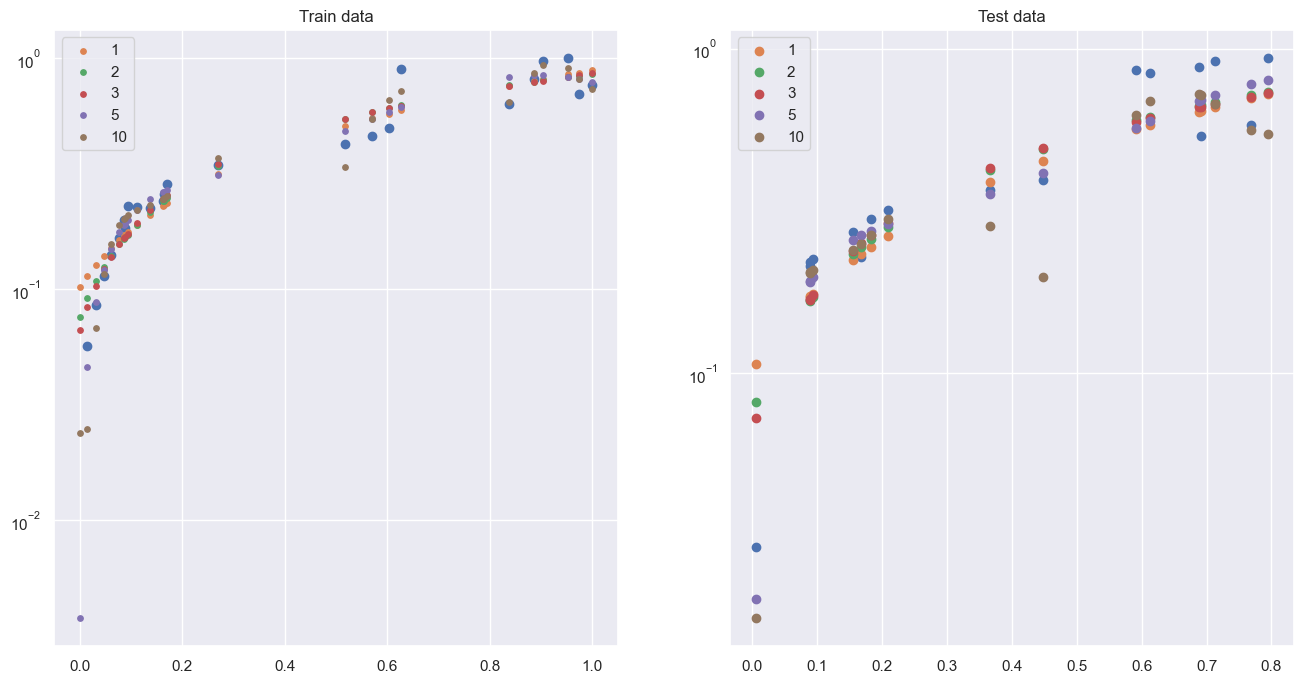

In [60]:
# 2023034 - MAHMUT ZAHID MALKOC
plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [61]:
# 2023034 - MAHMUT ZAHID MALKOC
# compare r2 for train and test sets
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

R-squared values: 

Polynomial degree 1: train score=0.89, test score=0.74
Polynomial degree 2: train score=0.89, test score=0.78
Polynomial degree 3: train score=0.89, test score=0.77
Polynomial degree 5: train score=0.91, test score=0.79
Polynomial degree 10: train score=0.95, test score=0.73


In [62]:
# 2023034 - MAHMUT ZAHID MALKOC
df_train, df_test = train_test_split(housing, train_size = 0.6, 
                                              test_size = 0.4, 
                                              random_state = 100)

scaler = MinMaxScaler() 
numeric_vars = ['IEPopulation', 'DublinPopulation','IEUrbanPopulation','IEMigrantPopulation','IEInflationRate',
                'IEInflationAnnualChangeRate','IEGDP$B','IEGDPPerCapita$', 'IEGDPGrowthRate',
                'IEUnemploymentRate','IEUnemploymentRateAnnualChangeRate','IERefugeesGrantedAsylum',
                'IERefugeesGrantedAsylumAnnualChangeRate','NationalHouseConstructionCostIndex100Base1991',
                'NationalHouseConstructionCostIndexIncreaseonPreviousYearRate','NationalNewHousePrice','DublinNewHousePrice']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
print(df_train.head())

df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
print(df_test.head())

    Year  NationalHouseConstructionCostIndex100Base1991  \
13  2003                                       0.699269   
1   2015                                       0.978976   
26  1990                                       0.000000   
12  2004                                       0.744973   
31  1985                                       0.000000   

    NationalHouseConstructionCostIndexIncreaseonPreviousYearRate  \
13                                           0.186207              
1                                            0.034483              
26                                           0.000000              
12                                           0.193103              
31                                           0.000000              

    DublinNewHousePrice  NationalNewHousePrice  IEPopulation  \
13             0.689239               0.680636      0.515718   
1              0.904002               0.865822      1.000000   
26             0.163157               0.1627

In [63]:
# 2023034 - MAHMUT ZAHID MALKOC
y_train = df_train.pop('DublinNewHousePrice')
X_train = df_train

y_test = df_test.pop('DublinNewHousePrice')
X_test = df_test

len(X_train.columns)

17

In [64]:
# 2023034 - MAHMUT ZAHID MALKOC
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9896993876684083


In [65]:
# 2023034 - MAHMUT ZAHID MALKOC
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', False, 4),
 ('NationalHouseConstructionCostIndex100Base1991', False, 5),
 ('NationalHouseConstructionCostIndexIncreaseonPreviousYearRate', False, 7),
 ('NationalNewHousePrice', True, 1),
 ('IEPopulation', True, 1),
 ('DublinPopulation', True, 1),
 ('IEUrbanPopulation', True, 1),
 ('IEMigrantPopulation', True, 1),
 ('IEInflationRate', False, 8),
 ('IEInflationAnnualChangeRate', False, 6),
 ('IEGDP$B', True, 1),
 ('IEGDPPerCapita$', True, 1),
 ('IEGDPGrowthRate', False, 2),
 ('IEUnemploymentRate', False, 3),
 ('IEUnemploymentRateAnnualChangeRate', True, 1),
 ('IERefugeesGrantedAsylum', True, 1),
 ('IERefugeesGrantedAsylumAnnualChangeRate', True, 1)]

In [66]:
# 2023034 - MAHMUT ZAHID MALKOC
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9903896435774353


In [67]:
# 2023034 - MAHMUT ZAHID MALKOC
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.93671884, 0.99097844, 0.78499682, 0.99268337, 0.993941  ])

In [68]:
# 2023034 - MAHMUT ZAHID MALKOC
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([ 0.85102429,  0.9759675 ,  0.96383691, -5.87053149,  0.98965364])

In [69]:
# 2023034 - MAHMUT ZAHID MALKOC
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00701116, -0.00117338, -0.01017237, -0.00097147, -0.000529  ])

In [70]:
# 2023034 - MAHMUT ZAHID MALKOC
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 18))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17]}],
             return_train_score=True, scoring='r2', verbose=1)

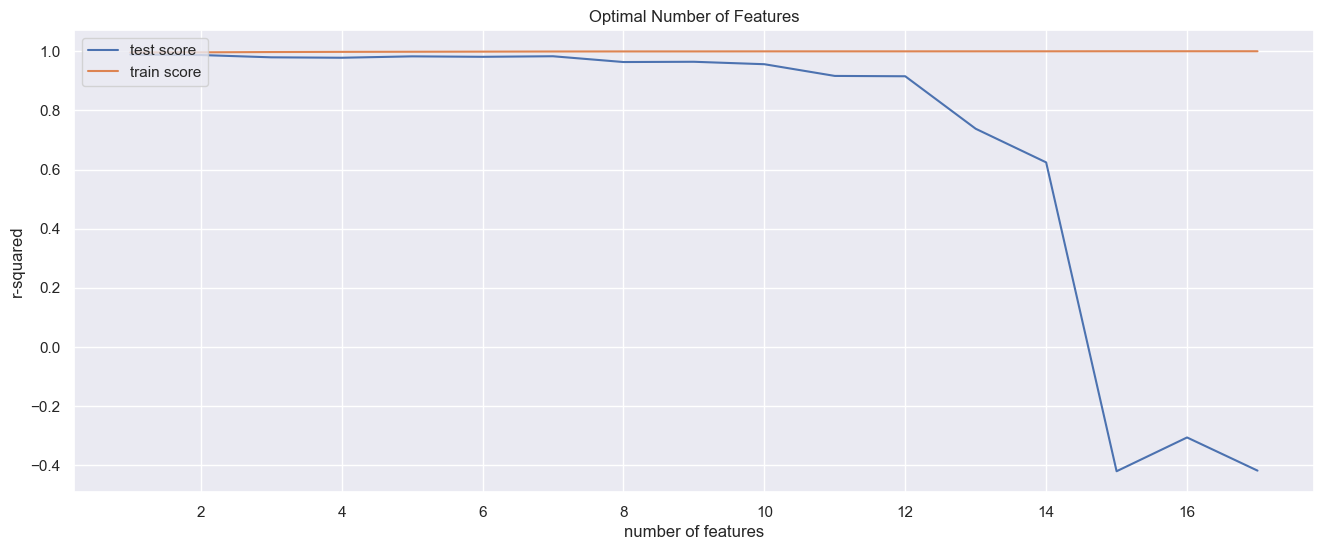

In [71]:
# 2023034 - MAHMUT ZAHID MALKOC
cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [72]:
# 2023034 - MAHMUT ZAHID MALKOC
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9764610765118404


# XGBOOST MODEL

In [73]:
# 2023034 - MAHMUT ZAHID MALKOC
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X, y = housing.iloc[:, :-1], housing.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 123)

xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

xgb_r.fit(train_X, train_y)

pred = xgb_r.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[23:56:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.368941
